# Credit EDA Case Study

[ Team members - Ankita Divya: ankita23divya@gmail.com ]

This case study involves studying a credit loan dataset and understand the driving factors in order to improve business for the company. 
The main focus is to perfrom risk analysis and understand how data is used to minimise the risk of losing money while lending to customers. 
<br>

### Problem Statement:
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.<br>
<br>
Two types of risks that are associated with the bank’s decision are:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the bank/company.
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


In [1]:
#importing the warnings library
import warnings

warnings.filterwarnings('ignore')

In [2]:
#importing the other required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Loading the data set :

In [151]:
app = pd.read_csv("application_data.csv")

In [4]:
# Viewing first 5 rows of dataframe
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
# Setting max columns and max rows to display all columns and rows.
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
app.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
# Checking the shape of the 'app' dataframe
app.shape


(307511, 122)

The 'app' dataframe consists of 307511 rows and 122 columns.

In [8]:
# Checking the different columns/variables and their data types 
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [9]:
# Displaying numeric data types
app.select_dtypes('int64', 'float64').head(5)

SK_ID_CURR  TARGET  CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
0      100002       1             0       -9461           -637   
1      100003       0             0      -16765          -1188   
2      100004       0             0      -19046           -225   
3      100006       0             0      -19005          -3039   
4      100007       0             0      -19932          -3038   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  REGION_RATING_CLIENT  \
0                 1           1           0                     2   
1                 1           1           0                     1   
2                 1           1           0                     2   
3                 1           0           0                     2   
4                 1           0           0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  FLAG_DOCUMENT_2  \
0                       0                        0                0   
1                       0                        0                0   
2                       0                        0                0   
3                       0                        0                0   
4                       1                        1                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                1                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0  

In [10]:
# Display statistics of the dataset.
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Data Cleaning and handling missing values:

In [11]:
#Columns which are having lesser number of unique values can be considered as categorical columns .

app.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY         2
FLAG_DOCUMENT_18                2
FLAG_DOCUMENT_14                2
FLAG_MOBIL                      2
FLAG_EMP_PHONE                  2
                            ...  
DAYS_REGISTRATION           15688
DAYS_BIRTH                  17460
EXT_SOURCE_1               114584
EXT_SOURCE_2               119831
SK_ID_CURR                 307511
Length: 122, dtype: int64

Columns like TARGET, FLAG_DOCUMENT_3, FLAG_PHONE, FLAG_DOCUMENT_2 which have only 2 distinct values (0 , 1) so they can be considered as categorical variables.

In [12]:
# Checking the value counts for object data type.
l = [col for col in app.columns if isinstance(col,str)]
for i in l:
    print(app[i].value_counts(), end = '\n\n')
    print('*'*50,end ='\n\n')

100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

**************************************************

0    282686
1     24825
Name: TARGET, dtype: int64

**************************************************

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

**************************************************

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**************************************************

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

**************************************************

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

**************************************************

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8

0.499002    5
0.622707    5
0.765724    5
0.443982    5
0.356323    5
           ..
0.241861    1
0.381263    1
0.259241    1
0.116346    1
0.844540    1
Name: EXT_SOURCE_1, Length: 114584, dtype: int64

**************************************************

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

**************************************************

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.018137       1
0.017017       1
0.858178       1
0.018924       1
0.024057       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

**************************************************

0.0825    6663
0.0619    6332
0.0928    4404
0.0722    3986
0.0082    3507
          ... 
0.1987       1
0.2519       1
0.9804       1
0.1677       1
0.7608       1
Name: APARTMENT

Name: ENTRANCES_MEDI, dtype: int64

**************************************************

0.1667    63607
0.3333    33279
0.0417    14832
0.3750     8207
0.1250     7079
0.0833     6657
0.4583     3089
0.0000     2995
0.6250     2042
0.5417     1860
0.2500     1684
0.6667     1675
0.2083     1544
0.2917      567
0.1042      460
0.3542      459
0.5833      439
0.3958      346
0.4167      329
0.1458      321
0.5000      312
0.2708      291
0.1875      245
0.8750      223
0.4792      220
0.7083      204
1.0000      170
0.4375      138
0.7500      136
0.0625      132
0.3125      131
0.2292      128
0.0208      126
0.6042      115
0.9583       95
0.7917       61
0.5208       47
0.5625       46
0.8333       39
0.9167       37
0.6458       30
0.7708       27
0.6875       24
0.8125       23
0.7292       10
0.9375        4
0.8542        3
0.8958        2
0.9792        1
Name: FLOORSMAX_MEDI, dtype: int64

**************************************************

0.2083    33737
0.3750    18538
0.0417  

Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

**************************************************

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

**************************************************

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

**************************************************

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: 

In [13]:
# Number of missing values in each column
obj = app.isnull().sum()
for key,value in obj.iteritems():
    print(key,":",value)

SK_ID_CURR : 0
TARGET : 0
NAME_CONTRACT_TYPE : 0
CODE_GENDER : 0
FLAG_OWN_CAR : 0
FLAG_OWN_REALTY : 0
CNT_CHILDREN : 0
AMT_INCOME_TOTAL : 0
AMT_CREDIT : 0
AMT_ANNUITY : 12
AMT_GOODS_PRICE : 278
NAME_TYPE_SUITE : 1292
NAME_INCOME_TYPE : 0
NAME_EDUCATION_TYPE : 0
NAME_FAMILY_STATUS : 0
NAME_HOUSING_TYPE : 0
REGION_POPULATION_RELATIVE : 0
DAYS_BIRTH : 0
DAYS_EMPLOYED : 0
DAYS_REGISTRATION : 0
DAYS_ID_PUBLISH : 0
OWN_CAR_AGE : 202929
FLAG_MOBIL : 0
FLAG_EMP_PHONE : 0
FLAG_WORK_PHONE : 0
FLAG_CONT_MOBILE : 0
FLAG_PHONE : 0
FLAG_EMAIL : 0
OCCUPATION_TYPE : 96391
CNT_FAM_MEMBERS : 2
REGION_RATING_CLIENT : 0
REGION_RATING_CLIENT_W_CITY : 0
WEEKDAY_APPR_PROCESS_START : 0
HOUR_APPR_PROCESS_START : 0
REG_REGION_NOT_LIVE_REGION : 0
REG_REGION_NOT_WORK_REGION : 0
LIVE_REGION_NOT_WORK_REGION : 0
REG_CITY_NOT_LIVE_CITY : 0
REG_CITY_NOT_WORK_CITY : 0
LIVE_CITY_NOT_WORK_CITY : 0
ORGANIZATION_TYPE : 0
EXT_SOURCE_1 : 173378
EXT_SOURCE_2 : 660
EXT_SOURCE_3 : 60965
APARTMENTS_AVG : 156061
BASEMENTAREA_AVG 

In [14]:
# Percentage of missing values in each column:
percentage_missing_values = round(app.isnull().mean() * 100, 2)
percentage_missing_values

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [15]:
# Listing the columns which have a high percentage of missing values (>=50%)
percentage_missing_values[percentage_missing_values.values >= 50]

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [16]:
percentage_missing_values[percentage_missing_values.values >= 50].count()

41

41 columns have >=50 % of missing values

In [17]:
# Dropping these columns
dropcol = list(percentage_missing_values[percentage_missing_values.values>=50].index)
# print(len(dropcol)) # Check number of columns before dropping : 41
app.drop(labels=dropcol, axis=1, inplace=True)


In [18]:
app.shape

(307511, 81)

In [19]:
app.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

We can see that the columns have now been dropped.

In [20]:
# Check columns with low percentage of missing values (<=13)
percentage_missing_values[np.logical_and(percentage_missing_values.values <=13, percentage_missing_values.values > 0)]

AMT_GOODS_PRICE             0.09
NAME_TYPE_SUITE             0.42
EXT_SOURCE_2                0.21
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
dtype: float64

In [21]:
percentage_missing_values[np.logical_and(percentage_missing_values.values <=13, percentage_missing_values.values > 0)].count()

7

There are 7 columns with less number of missing values.

Above 7 columns have <=13% of missing values. The missing values for these columns can be imputed using appropriate methods as discussed below.

In [22]:
# Checking values in CODE_GENGER column
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

The value XNA stands for Not Available and since it is a small percentage of missing value it can be imputed with the mode - 'F'

In [23]:
app.CODE_GENDER.mode()

0    F
dtype: object

In [24]:
# Imputing the missing value for column CODE_GENDER
app[app.CODE_GENDER == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657            -10024.0            -3537           1               1   
38566             -2241.0            -4659           1               1   
83382              -183.0            -1671           1               1   
189640            -4099.0            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657                  NaN              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640                 NaN              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

In [25]:
# Replace with mode- 'F'
app.loc[app.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'

In [26]:
# Successfully imputed
app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### Cleaning of data:

In [27]:
# Verifying that the column has correct data type
app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [28]:
# Checking number of unique values in each column
app.nunique().sort_values()

FLAG_DOCUMENT_3                    2
FLAG_PHONE                         2
FLAG_DOCUMENT_4                    2
FLAG_DOCUMENT_2                    2
REG_REGION_NOT_LIVE_REGION         2
                               ...  
AMT_ANNUITY                    13672
DAYS_REGISTRATION              15688
DAYS_BIRTH                     17460
EXT_SOURCE_2                  119831
SK_ID_CURR                    307511
Length: 81, dtype: int64

##### Categorical columns needed to be converted to object data type
<pre>
Column name                   dtype     count <br>
AMT_REQ_CREDIT_BUREAU_WEEK	float64	9 <br>
FLAG_CONT_MOBILE        	  int64	  2 <br>
FLAG_EMAIL	                int64	  2<br>
LIVE_CITY_NOT_WORK_CITY	   int64	  2<br>
TARGET                  	  int64	  2<br>
AMT_REQ_CREDIT_BUREAU_HOUR	float64    5<br>
FLAG_DOCUMENT_9	           int64	  2<br>
FLAG_PHONE	                int64	  2<br>
REG_CITY_NOT_LIVE_CITY	    int64	  2<br>
REG_REGION_NOT_LIVE_REGION    int64	  2<br>
</pre>

In [29]:
#Below columns are converted to the object type

app.AMT_REQ_CREDIT_BUREAU_WEEK = app.AMT_REQ_CREDIT_BUREAU_WEEK.astype('str')
app.FLAG_CONT_MOBILE = app.FLAG_CONT_MOBILE.astype('str')
app.FLAG_EMAIL = app.FLAG_EMAIL.astype('str')
app.LIVE_CITY_NOT_WORK_CITY = app.LIVE_CITY_NOT_WORK_CITY.astype('str')
app.TARGET = app.TARGET.astype('str')
app.AMT_REQ_CREDIT_BUREAU_HOUR = app.AMT_REQ_CREDIT_BUREAU_HOUR.astype('str')
app.FLAG_DOCUMENT_9 = app.FLAG_DOCUMENT_9.astype('str')
app.FLAG_PHONE = app.FLAG_PHONE.astype('str')
app.REG_CITY_NOT_LIVE_CITY = app.REG_CITY_NOT_LIVE_CITY.astype('str')
app.REG_REGION_NOT_LIVE_REGION = app.REG_REGION_NOT_LIVE_REGION.astype('str')


In [30]:
# Verifying the datatypes
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [31]:
app[app.DAYS_BIRTH > 0]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

DAYS_BIRTH is the Client's age in days at the time of application. This cannot be negative. 
DAYS_BIRTH column has all negative values as seen above.
As part of data cleaning, these values can be made positive

In [32]:
# Converting DAYS_BIRTH values to the absolute values
app.DAYS_BIRTH = app.DAYS_BIRTH.abs()

In [33]:
# Check if all values are converted.
app[app.DAYS_BIRTH < 0]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

Similiarly absolute values can be taken for columns DAYS_REGISTRATION and DAYS_LAST_PHONE_CHANGE since this column contains only negative values. 

### Checking outliers for different numeric columns

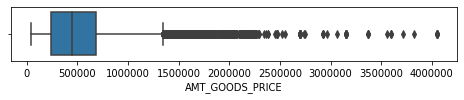

In [34]:
# Finding the presence of outliers in AMT_GOODS_PRICE column
plt.figure(figsize=[8,1])
sns.boxplot(app.AMT_GOODS_PRICE)
plt.show()

In [35]:
app.AMT_GOODS_PRICE.median()

450000.0

- 'AMT_GOODS_PRICE' column has 278 (approax 0.09 %) missing values. It is a numerical variable and has a large number of outliers. Hence, it is better to impute missing values in such a column with the median of the column - 450000.0

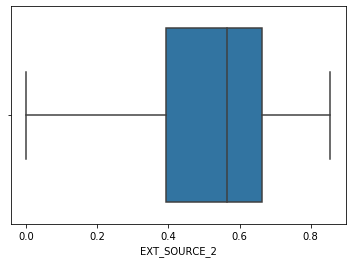

In [36]:
# Finding the presence of outliers in EXT_SOURCE_2 column
sns.boxplot(app.EXT_SOURCE_2)
plt.show()

In [37]:
app.EXT_SOURCE_2.mean()

0.5143926741308463

- 'EXT_SOURCE_2 column has 660 (approax - 0.21 %) missing values. It is a numerical variable with not too many outliers as seen in the boxplot above. The missing values can be replaced with the mean value (0.5143926741308463) wherever values are missing.

In [38]:
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

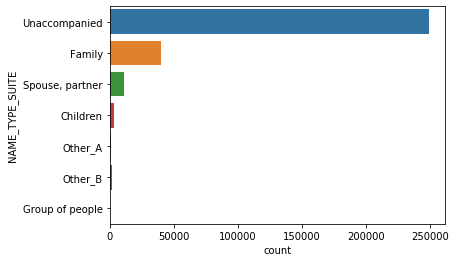

In [39]:
# Plotting the count of NAME_TYPE_SUITE against the various values present.
# NAME_TYPE_SUITE - Who accompanied client when applying for the previous application
sns.countplot(y = app.NAME_TYPE_SUITE, data = app)
plt.show()

As NAME_TYPE_SUITE is a categorical variable and has only few null values(approax - 0.42 %), we can impute this column with the mode value i.e "Unaccompanied" as its ocurring for 248526 times in the column.

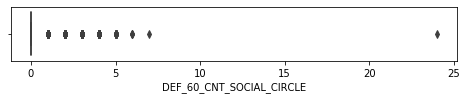

In [40]:
plt.figure(figsize=[8,1])
sns.boxplot(app.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()

- 'DEF_60_CNT_SOCIAL_CIRCLE' is a numeric variable with many widely spaced outliers. We can impute this column with the median value.

In [41]:
# app.ORGANIZATION_TYPE.count()  #307511
# app.ORGANIZATION_TYPE.value_counts() # XNA - 55374

ORGANIZATION_TYPE column has 55374 values as 'XNA' out of 307511 as seen from the code commented above. It will not be ideal to impute the missing values here.

In [42]:
# Obtain the numeric columns:
app._get_numeric_data().head(2)

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801        9461           -637   
1        1129500.0                    0.003541       16765          -1188   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0            -3648.0            -2120           1               1   
1            -1186.0             -291           1               1   

   FLAG_WORK_PHONE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                0              1.0                     2   
1                0              2.0                     1   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   

   REG_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  \
0                       0      0.262949      0.139376   
1                       0      0.622246           NaN   

   YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  \
0                       0.9722         0.0833                        0.9722   
1                       0.9851         0.2917                        0.9851   

   FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  \
0          0.0833                        0.9722          0.0833   
1          0.2917                        0.9851          0.2917   

   TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0          0.0149                       2.0                       2.0   
1          0.0714                       1.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0   
1                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0

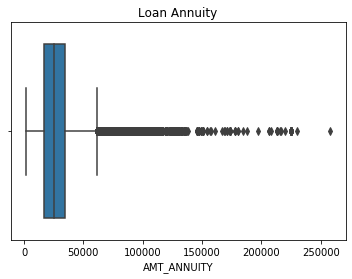

In [43]:
sns.boxplot(x = app.AMT_ANNUITY).set_title("Loan Annuity")
plt.show()

In [44]:
app.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

As seen in the boxplot above, most of the values for Loan Annuity lie between 16524
and 34596. The rest of them are outliers which are closely spaced outliers.

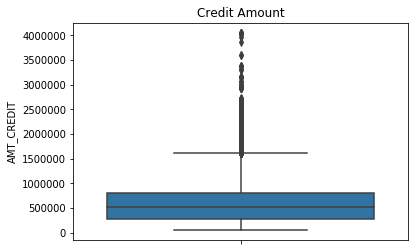

In [45]:
# Plotting Credit amount of the loan
sns.boxplot(y = app.AMT_CREDIT).set_title("Credit Amount")
plt.show()

In [46]:
app.AMT_CREDIT.quantile([0, 0.25, 0.5, 0.75, 0.1]) 

0.00     45000.0
0.25    270000.0
0.50    513531.0
0.75    808650.0
0.10    180000.0
Name: AMT_CREDIT, dtype: float64

AMT_CREDIT takes most values between 270000.0 and 808650.0. But there are some outliers in the column that are closely spaced.

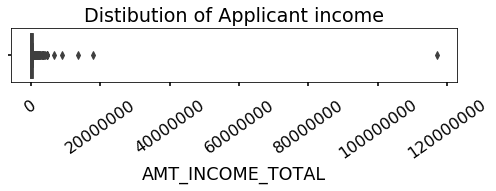

In [47]:
plt.style.use("seaborn-poster")
plt.figure(figsize=[8,1])
sns.boxplot(app.AMT_INCOME_TOTAL).set_title('Distibution of Applicant income')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=35)
plt.show()

The boxplot above clearly shows a few variations from the general trend of income values. But there is one particular value which stands out and is largely spaced from the rest of the values. This can be termed as an outlier. <br>
This can also be a valid value since an applicant can have a very high income. The way to deal with this would depend on the impact of this variable of the target variable which we will see in further analysis.

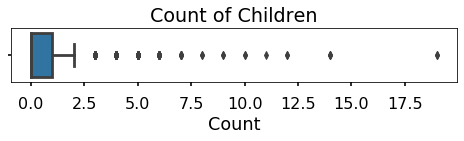

In [48]:
# plotting count of chilren of the applicant
plt.figure(figsize=[8,1])
sns.boxplot(app.CNT_CHILDREN).set_title("Count of Children")
plt.xlabel("Count")
plt.show()

Number of children lies mostly between 0 to 3. However we can see outliers that take up values upto 17+. These values sound absurd and seems like an outlier.


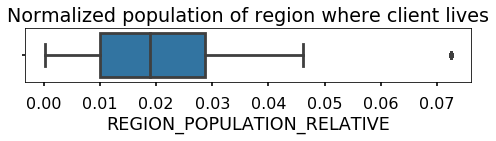

In [49]:
plt.figure(figsize=[8,1])
sns.boxplot(app.REGION_POPULATION_RELATIVE).set_title('Normalized population of region where client lives')
plt.show()

Another stark outlier is visible in the graph above for the variable REGION_POPULATION_RELATIVE which is the Normalized population of region where client lives. However such high value can also be valid.

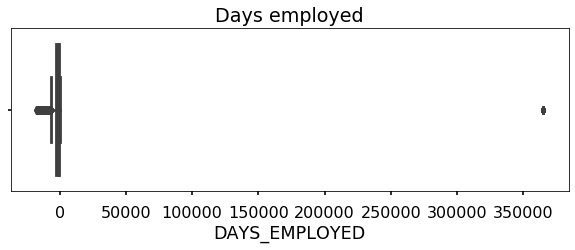

In [50]:
plt.figure(figsize=[10,3])
sns.boxplot(x = app.DAYS_EMPLOYED).set_title("Days employed")
plt.show()    

DAYS_EMPLOYED column also has a single outlier as seen in the boxplot above. But it can still be a valid value since the number of days before applying that the person started current employment can be very high. 

###  DERVIED METRIC - Binning of values:

In [51]:
app.head(2)

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002      1         Cash loans           M            N   
1      100003      0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                1          1          0        Laborers              1.0   
1                1          1          0      Core staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   

   LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                            0                      0                       0   
1                            0                      0                       0   

  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0                       0  Business Entity Type 3      0.262949      0.139376   
1                       0                  School      0.622246           NaN   

   YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  \
0                       0.9722         0.0833                        0.9722   
1                       0.9851         0.2917                        0.9851   

   FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  \
0          0.0833                        0.9722          0.0833   
1          0.2917                        0.9851          0.2917   

   TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0          0.0149                  No                       2.0   
1          0.0714                  No                       1.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                       2.0                 -1134.0                0   
1                       0.0                  -828.0                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8 FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0               0                 0   
1                0                0               0                 0   

   FLAG_DOCU

In [52]:
# Binning AMT_INCOME_TOTAL column values into 4 bins
app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
app.AMT_INCOME_TOTAL.quantile([0, 0.25, 0.5, 0.75, 0.1])

0.00     25650.0
0.25    112500.0
0.50    147150.0
0.75    202500.0
0.10     81000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
# Binning AMT_INCOME_TOTAL column values into 4 bins
app["INCOME_CATEGORY"] = pd.cut(app.AMT_INCOME_TOTAL, bins = [25650.0, 112500.0, 147150.0, 202500.0, 117000000.0], labels = ["Low", "Medium", "High", "Very High"])
app[["AMT_INCOME_TOTAL", "INCOME_CATEGORY"]].head()


AMT_INCOME_TOTAL INCOME_CATEGORY
0          202500.0            High
1          270000.0       Very High
2           67500.0             Low
3          135000.0          Medium
4          121500.0          Medium

In [55]:
app.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [56]:
# Binning DAYS_BIRTH column values into 4 bins
app["AGE_GROUP"] = pd.cut(app.DAYS_BIRTH, bins = [7489,11924,16359,20794,25229],labels = [" Young Adult","Middle Aged","Old Adult","Senior People"])
app[["DAYS_BIRTH","AGE_GROUP"]].tail(5)

DAYS_BIRTH     AGE_GROUP
307506        9327   Young Adult
307507       20775     Old Adult
307508       14966   Middle Aged
307509       11961   Middle Aged
307510       16856     Old Adult

### Analyzing the TARGET COLUMN

In [57]:
app.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [58]:
# Percentage values
app.TARGET.value_counts(normalize=True) * 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

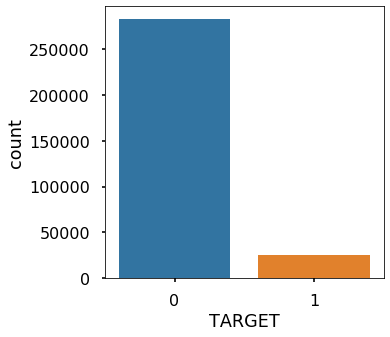

In [59]:
plt.figure(figsize=[5,5])
sns.countplot(x='TARGET', data=app)

plt.show()

we could see that data is imbalanced as  91.93% values are present for target = 0 i.e majority clients are not having payment difficulties while only 8.07% clients face difficulty while repaying the loan.

In [60]:
df1 = app[app.TARGET == '1']
df1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002      1         Cash loans           M            N   
26      100031      1         Cash loans           F            N   
40      100047      1         Cash loans           M            N   
42      100049      1         Cash loans           F            N   
81      100096      1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461           -637            -3648.0   
26                    0.018029       18724          -2628            -6573.0   
40                    0.025164       17482          -1262            -1182.0   
42                    0.007305       13384          -3597              -45.0   
81                    0.028663       24794         365243            -5391.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120           1               1                0   
26            -1827           1               1                0   
40            -1029           1               1                0   
42            -4409           1               1                1   
81            -4199           1               0                0   

   FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1          1          0        Laborers              1.0   
26                1          0          0   Cooking staff              1.0   
40                1          0          0        Laborers              2.0   
42                1          1          0     Sales staff              2.0   
81                1          0          0             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
26                          0                           0   
40                          0               

In [61]:
df1.shape

(24825, 83)

In [62]:
df1.TARGET.value_counts()

1    24825
Name: TARGET, dtype: int64

In [63]:
df0 = app[app.TARGET == '0']
df0.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003      0         Cash loans           F            N   
2      100004      0    Revolving loans           M            Y   
3      100006      0         Cash loans           F            N   
4      100007      0         Cash loans           M            N   
5      100008      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765          -1188            -1186.0   
2                    0.010032       19046           -225            -4260.0   
3                    0.008019       19005          -3039            -9833.0   
4                    0.028663       19932          -3038            -4311.0   
5                    0.035792       16941          -1588            -4970.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   
5             -477           1               1                1   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                1          1          0      Core staff              2.0   
2                1          1          0        Laborers              1.0   
3                1          0          0        Laborers              2.0   
4                1          0          0      Core staff              1.0   
5                1          1          0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   
5   

In [64]:
df0.TARGET.value_counts()

0    282686
Name: TARGET, dtype: int64

In [65]:
df0.shape

(282686, 83)

### Univariate Analysis for Continuous Variable

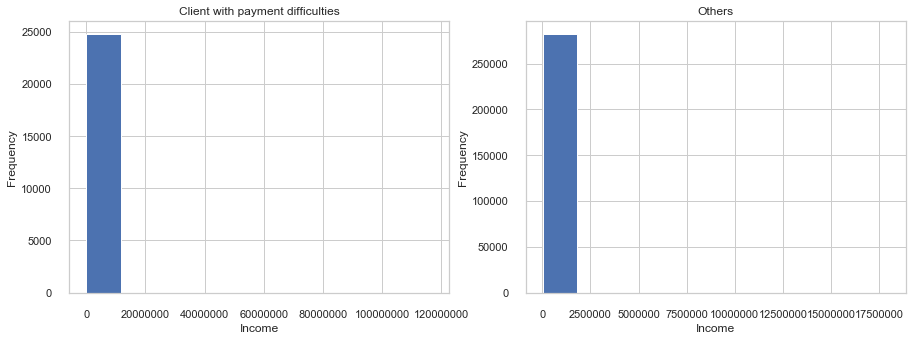

In [66]:
# Plotting Income amount for the TARGET variable.
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.ylabel("Frequency")
plt.xlabel("Income")
plt.hist(df1.AMT_INCOME_TOTAL,bins =10)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.subplot(1,2,2)
plt.title("Others")
plt.hist(df0.AMT_INCOME_TOTAL,bins =10)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.gcf().axes[1].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)
plt.show()

As seen in the histplot above maximum Clients with payment difficulties have lower income compared to the Other clients. Some of the 'Other' clients have very high income values as well. This means that clients who are able to repay loans dont struggle with paying off loans due to higher incomes.

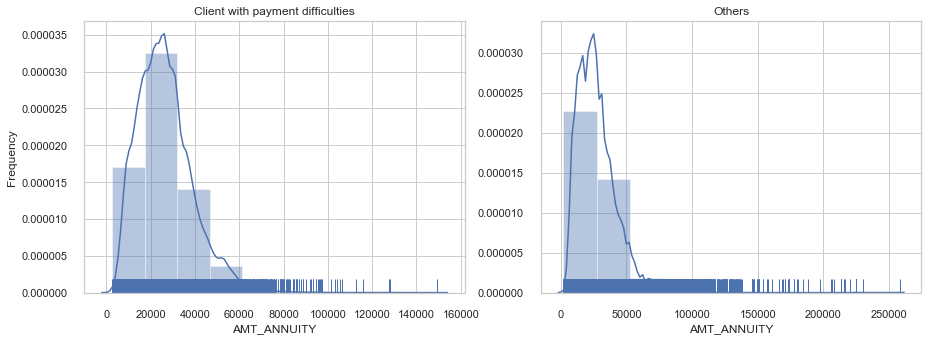

In [67]:
# Plotting AMT_ANNUITY for the TARGET variable
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.ylabel("Frequency")
sns.distplot(df1.AMT_ANNUITY, bins=10, rug=True)

plt.subplot(1,2,2)
plt.title("Others")
sns.distplot(df0.AMT_ANNUITY, bins=10, rug=True)
plt.show()

The displot for "Clients with payment difficulties" against Loan Annuity amount looks like a normal distribution with maximum values lying near the mean. The plot for "others" is right skewed and the most clients who repay easily have their loan annuity upto 50000 approax.

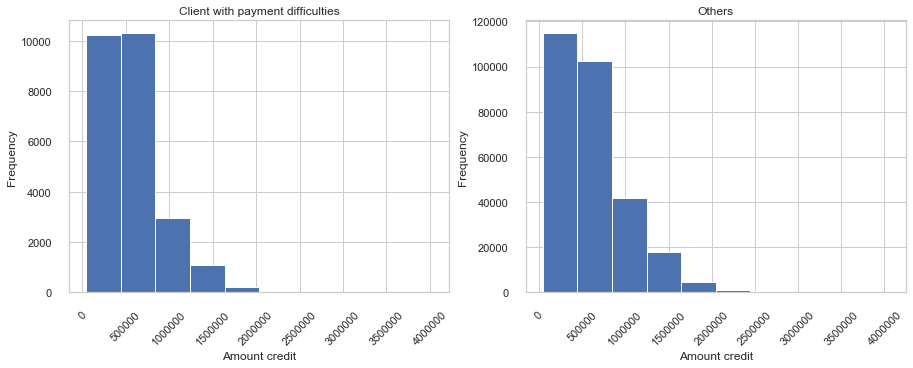

In [68]:
# Plotting AMT_CREDIT for the TARGET variable
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.xlabel("Amount credit")
df1.AMT_CREDIT.plot.hist()
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title("Others")
plt.xlabel("Amount credit")
df0.AMT_CREDIT.plot.hist()
plt.xticks(rotation=45)
plt.show()


For both target variable 1 and 0  the, number of clients taking loans of amount greater than 10,00,000 is  low. Clients borrow money mostly upto amount 10,00,000. Also most clients who repay without any difficulty are having the amount credit upto 500000. While on the other hand most of the Clients having payment difficulties have the amount credit upto 1000000

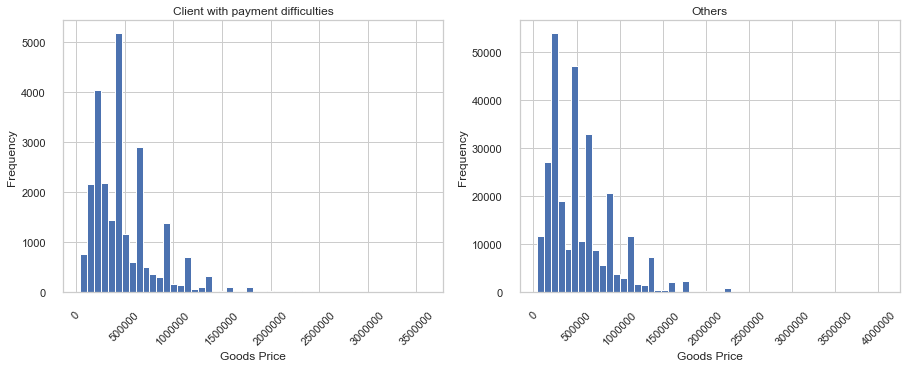

In [69]:
# Plotting AMT_GOODS_PRICE for the TARGET variable
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.ylabel("Frequency")
plt.xlabel("Goods Price")
plt.hist(df1.AMT_GOODS_PRICE,bins =50)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title("Others")
plt.hist(df0.AMT_GOODS_PRICE,bins =50)
plt.xlabel("Goods Price")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

Most clients with payment difficulties have the goods amount as 500000 while clients who repay without struggling have goods amount as 250000 approximately.

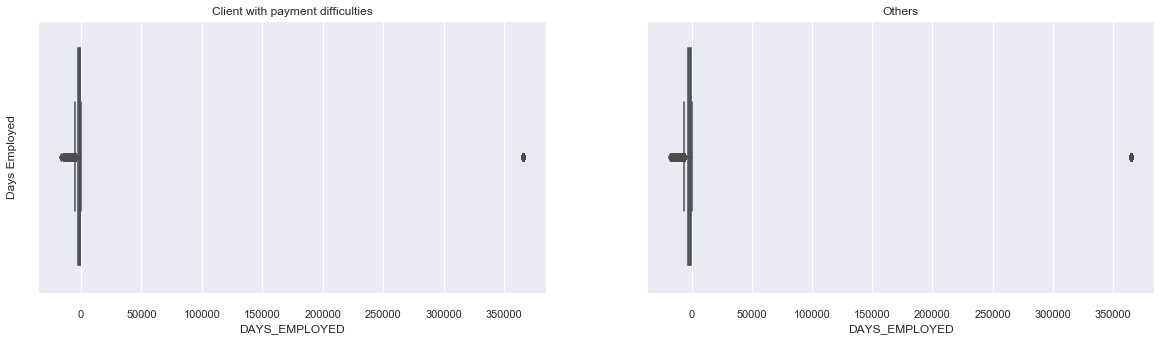

In [70]:
# Plotting Days employed for the TARGET variable.
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.ylabel("Days Employed")
sns.boxplot(x = df1.DAYS_EMPLOYED)

plt.subplot(1,2,2)
plt.title("Others")
sns.boxplot(x = df0.DAYS_EMPLOYED)
plt.show()

For both type of clients, we can see a distant outlier present which possibly could mean that there exist few clients who have started current employment many days before the application.

### Univariate Analysis for Categorical Variable

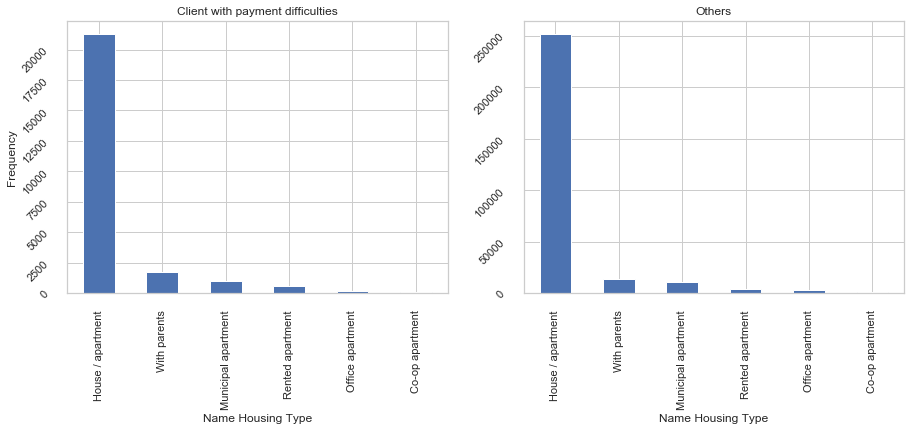

In [71]:
# Plotting NAME_HOUSING_TYPE for TARGET variable
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.xlabel("Name Housing Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
chart = df1.NAME_HOUSING_TYPE.value_counts().plot.bar()

plt.subplot(1,2,2)
plt.title("Others")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel("Name Housing Type")
df0.NAME_HOUSING_TYPE.value_counts().plot.bar()
plt.show()

For both type of clients majority of the values fell into the House/apartment category 

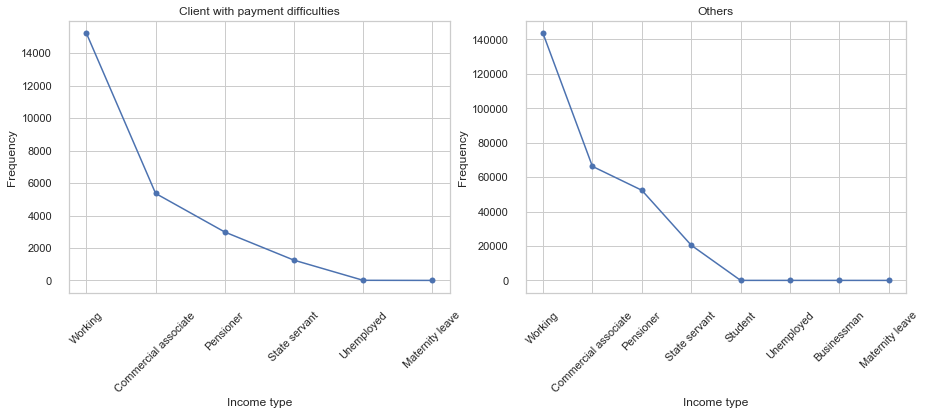

In [72]:
# Plotting NAME_INCOME_TYPE for TARGET variable

sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.xlabel("Income type")
plt.ylabel("Frequency") 
chart = df1.NAME_INCOME_TYPE.value_counts().plot.line(marker='o')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
plt.title("Others")
plt.xlabel("Income type")
plt.ylabel("Frequency")
chart2 = df0.NAME_INCOME_TYPE.value_counts().plot.line(marker='o')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.show()

For clients with payment difficulties "Working" category income type has maximum payment difficulty while for "others", "Working" category income type are able to repay.<br>
For Unemployed, those on maternity leaves, Student and Bussinessmen neither default nor repay loans which could possibly mean that they dont take loans.

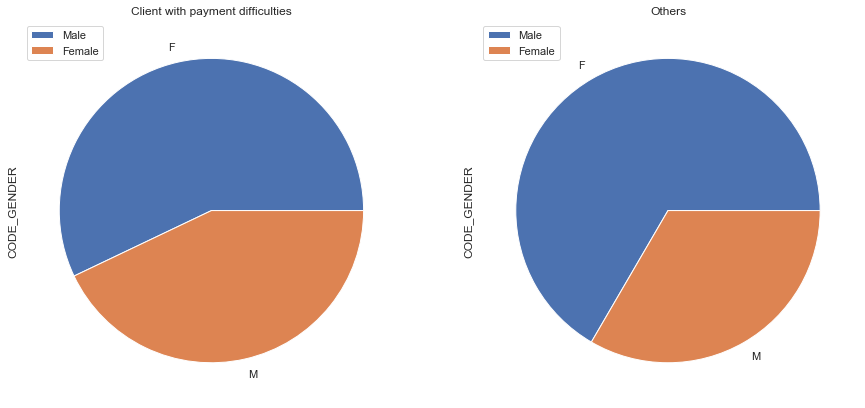

In [73]:
# Plotting CODE_GENDER for TARGET variable

sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
labels =["Male","Female"]
plt.title("Client with payment difficulties")

df1.CODE_GENDER.value_counts().plot.pie()
plt.legend(labels,loc=2)

plt.subplot(1,2,2)
plt.title("Others")
df0.CODE_GENDER.value_counts().plot.pie()
plt.legend(labels,loc=2)
plt.show()

Count of females opting for loans is higher than males in both the cases.

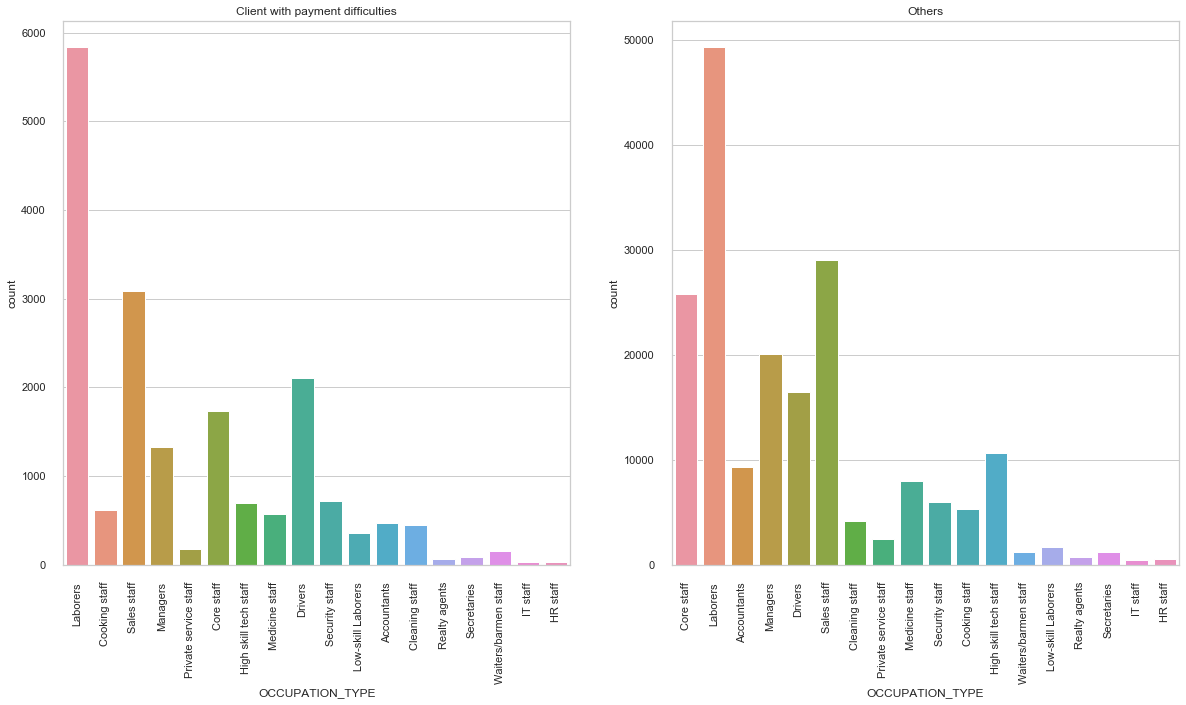

In [74]:
# Plotting OCCUPATION_TYPE for TARGET variable

sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
chart2 = sns.countplot(x= df1.OCCUPATION_TYPE, data=df1)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Others")
chart1 = sns.countplot(x= df0.OCCUPATION_TYPE, data=df0)
plt.xticks(rotation=90)
plt.show()

Labourers have the most difficulties in repayment and Realty Agents, Secretaries, IT Staff, HR staff have least repayment difficulties as compared to other occupation types<br>
In others category labourers repay the most and Realty Agents, Secretaries, IT Staff, HR staff repay less often as compared to other occupation types

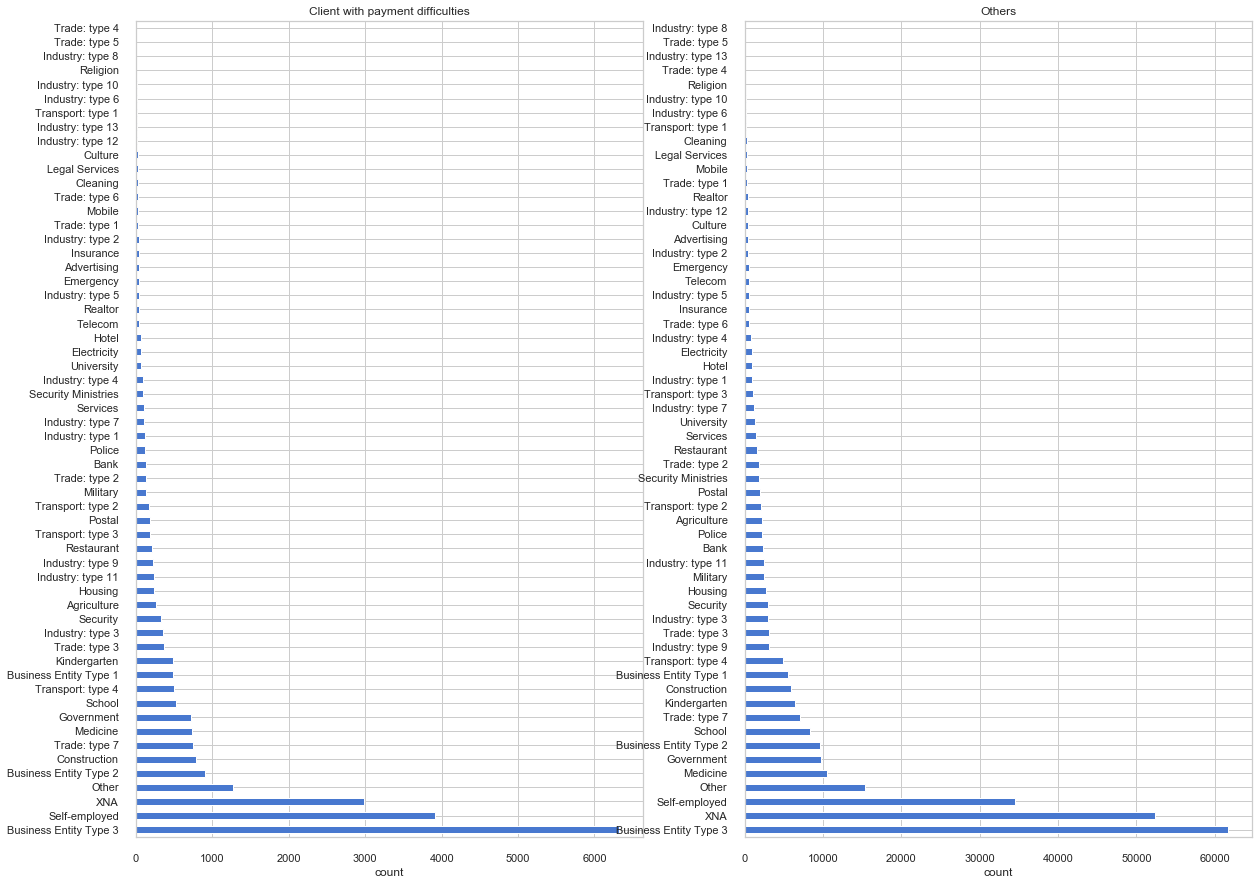

In [75]:
# Plotting ORGANIZATION_TYPE for TARGET variable

plt.style.use("seaborn-muted")
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.xlabel("count")
df1.ORGANIZATION_TYPE.value_counts().plot.barh()

plt.subplot(1,2,2)
plt.title("Others")
plt.xlabel("count")
df0.ORGANIZATION_TYPE.value_counts().plot.barh()
plt.show()

Bussiness Entity Type 3 has most repayment difficulties among all the occupation types. In both "Client with payment difficulties" and "Others" category, the number of clients taking loans for different occupation type has the same trend.

### Correlation 

In [76]:
#Top correlated values for Target = 1 & Target = 0

corr1 = df1.corr()
corr1

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                      1.000000     -0.005144         -0.010165   
CNT_CHILDREN                   -0.005144      1.000000          0.004796   
AMT_INCOME_TOTAL               -0.010165      0.004796          1.000000   
AMT_CREDIT                     -0.001290     -0.001675          0.038131   
AMT_ANNUITY                    -0.007578      0.031257          0.046421   
AMT_GOODS_PRICE                -0.001816     -0.008112          0.037583   
REGION_POPULATION_RELATIVE      0.006301     -0.031975          0.009135   
DAYS_BIRTH                      0.001254     -0.259109         -0.003096   
DAYS_EMPLOYED                  -0.005151     -0.191942         -0.014979   
DAYS_REGISTRATION               0.006342      0.149154          0.000158   
DAYS_ID_PUBLISH                -0.002539     -0.032299         -0.004215   
FLAG_MOBIL                           NaN           NaN               NaN   
FLAG_EMP_PHONE                  0.005248      0.192469          0.014971   
FLAG_WORK_PHONE                 0.004970      0.051712         -0.012146   
CNT_FAM_MEMBERS                -0.003816      0.885484          0.006654   
REGION_RATING_CLIENT           -0.005936      0.040680         -0.021486   
REGION_RATING_CLIENT_W_CITY    -0.004135      0.043185         -0.022808   
HOUR_APPR_PROCESS_START         0.005004     -0.023899          0.013775   
REG_REGION_NOT_WORK_REGION      0.004120     -0.020793          0.014531   
LIVE_REGION_NOT_WORK_REGION     0.004303     -0.012073          0.013409   
REG_CITY_NOT_WORK_CITY          0.000787      0.046115         -0.003019   
EXT_SOURCE_2                    0.006452     -0.012260          0.007154   
EXT_SOURCE_3                   -0.008178     -0.020268         -0.015110   
YEARS_BEGINEXPLUATATION_AVG     0.005597      0.004346          0.001642   
FLOORSMAX_AVG                   0.015976     -0.020326          0.009801   
YEARS_BEGINEXPLUATATION_MODE    0.007172      0.003981          0.001530   
FLOORSMAX_MODE                  0.013810     -0.019678          0.009299   
YEARS_BEGINEXPLUATATION_MEDI    0.006142      0.004048          0.001636   
FLOORSMAX_MEDI                  0.016045     -0.019923          0.009652   
TOTALAREA_MODE                  0.006284     -0.016258          0.006451   
OBS_30_CNT_SOCIAL_CIRCLE       -0.009395      0.025804         -0.004709   
DEF_30_CNT_SOCIAL_CIRCLE       -0.005549      0.001448         -0.005186   
OBS_60_CNT_SOCIAL_CIRCLE       -0.009058      0.025180         -0.004616   
DEF_60_CNT_SOCIAL_CIRCLE       -0.009428     -0.005106         -0.004866   
DAYS_LAST_PHONE_CHANGE          0.002455      0.011547         -0.002429   
FLAG_DOCUMENT_2                -0.002291     -0.007779          0.000168   
FLAG_DOCUMENT_3                -0.004640      0.060561          0.001446   
FLAG_DOCUMENT_4                      NaN           NaN               NaN   
FLAG_DOCUMENT_5                 0.002669     -0.022138         -0.001094   
FLAG_DOCUMENT_6                 0.003320     -0.129482         -0.011774   
FLAG_DOCUMENT_7                 0.002342     -0.001895         -0.000561   
FLAG_DOCUMENT_8                 0.003887      0.028766          0.016119   
FLAG_DOCUMENT_10                     NaN           NaN               NaN   
FLAG_DOCUMENT_11               -0.003634     -0.007550         -0.000172   
FLAG_DOCUMENT_12                     NaN           NaN               NaN   
FLAG_DOCUMENT_13               -0.001685      0.001663          0.006271   
FLAG_DOCUMENT_14                0.001327     -0.002932          0.003969   
FLAG_DOCUMENT_15                0.007977      0.004800          0.001871   
FLAG_DOCUMENT_16               -0.000704     -0.001079          0.001717   
FLAG_DOCUMENT_17               -0.005428     -0.005500         -0.000368   
FLAG_DOCUMENT_18               -0.009181      0.004333         -0.002177   
FLAG_DOCUMENT_19               -0.006382     -0.001370         -0.000371   
FL

In [77]:
corr0 = df0.corr()
corr0

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                      1.000000     -0.000716          0.001739   
CNT_CHILDREN                   -0.000716      1.000000          0.027397   
AMT_INCOME_TOTAL                0.001739      0.027397          1.000000   
AMT_CREDIT                     -0.000342      0.003081          0.342799   
AMT_ANNUITY                     0.000068      0.020905          0.418953   
AMT_GOODS_PRICE                -0.000205     -0.000525          0.349462   
REGION_POPULATION_RELATIVE      0.000360     -0.024363          0.167851   
DAYS_BIRTH                      0.001346     -0.336966         -0.062609   
DAYS_EMPLOYED                   0.001744     -0.243356         -0.141250   
DAYS_REGISTRATION              -0.001475      0.185792          0.064937   
DAYS_ID_PUBLISH                -0.000077     -0.028751          0.022896   
FLAG_MOBIL                      0.002925      0.001080          0.000733   
FLAG_EMP_PHONE                 -0.001717      0.244274          0.140744   
FLAG_WORK_PHONE                -0.000854      0.055453         -0.032404   
CNT_FAM_MEMBERS                -0.002790      0.878571          0.034256   
REGION_RATING_CLIENT           -0.000519      0.022842         -0.186573   
REGION_RATING_CLIENT_W_CITY    -0.000739      0.021866         -0.200466   
HOUR_APPR_PROCESS_START        -0.000115     -0.005244          0.076743   
REG_REGION_NOT_WORK_REGION      0.000836      0.010857          0.137174   
LIVE_REGION_NOT_WORK_REGION     0.002784      0.017326          0.127701   
REG_CITY_NOT_WORK_CITY         -0.001696      0.072193          0.017618   
EXT_SOURCE_2                    0.001589     -0.015455          0.139598   
EXT_SOURCE_3                    0.000309     -0.041729         -0.072401   
YEARS_BEGINEXPLUATATION_AVG     0.001202      0.007298          0.016485   
FLOORSMAX_AVG                   0.004096     -0.008307          0.181891   
YEARS_BEGINEXPLUATATION_MODE    0.001442      0.006545          0.015393   
FLOORSMAX_MODE                  0.003747     -0.008199          0.174416   
YEARS_BEGINEXPLUATATION_MEDI    0.000952      0.006783          0.016431   
FLOORSMAX_MEDI                  0.003810     -0.008063          0.180458   
TOTALAREA_MODE                  0.002040     -0.006972          0.125714   
OBS_30_CNT_SOCIAL_CIRCLE       -0.000695      0.014471         -0.027828   
DEF_30_CNT_SOCIAL_CIRCLE        0.000556     -0.002246         -0.027621   
OBS_60_CNT_SOCIAL_CIRCLE       -0.000741      0.014137         -0.027690   
DEF_60_CNT_SOCIAL_CIRCLE        0.002382     -0.002172         -0.027593   
DAYS_LAST_PHONE_CHANGE         -0.000998     -0.008501         -0.041338   
FLAG_DOCUMENT_2                 0.001342      0.003736         -0.002857   
FLAG_DOCUMENT_3                -0.003217      0.055718         -0.039251   
FLAG_DOCUMENT_4                -0.004321     -0.003833          0.001160   
FLAG_DOCUMENT_5                -0.001426     -0.016239          0.004161   
FLAG_DOCUMENT_6                 0.001972     -0.158963         -0.100271   
FLAG_DOCUMENT_7                -0.003047     -0.001442          0.009035   
FLAG_DOCUMENT_8                 0.001618      0.053919          0.159350   
FLAG_DOCUMENT_10               -0.000852     -0.002859          0.000637   
FLAG_DOCUMENT_11               -0.001900     -0.005059          0.005402   
FLAG_DOCUMENT_12               -0.001092      0.000322          0.005680   
FLAG_DOCUMENT_13                0.001006      0.004340          0.049421   
FLAG_DOCUMENT_14               -0.001236     -0.005455          0.045590   
FLAG_DOCUMENT_15                0.002330      0.003710          0.023814   
FLAG_DOCUMENT_16               -0.000753      0.011775          0.015800   
FLAG_DOCUMENT_17                0.001776      0.001160          0.005141   
FLAG_DOCUMENT_18                0.001194      0.004181          0.008214   
FLAG_DOCUMENT_19                0.000676      0.001078          0.005762   
FL

In [78]:
#removing the reapeated correlated columns
corr1_df1 = corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr1_df1

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                           NaN     -0.005144         -0.010165   
CNT_CHILDREN                         NaN           NaN          0.004796   
AMT_INCOME_TOTAL                     NaN           NaN               NaN   
AMT_CREDIT                           NaN           NaN               NaN   
AMT_ANNUITY                          NaN           NaN               NaN   
AMT_GOODS_PRICE                      NaN           NaN               NaN   
REGION_POPULATION_RELATIVE           NaN           NaN               NaN   
DAYS_BIRTH                           NaN           NaN               NaN   
DAYS_EMPLOYED                        NaN           NaN               NaN   
DAYS_REGISTRATION                    NaN           NaN               NaN   
DAYS_ID_PUBLISH                      NaN           NaN               NaN   
FLAG_MOBIL                           NaN           NaN               NaN   
FLAG_EMP_PHONE                       NaN           NaN               NaN   
FLAG_WORK_PHONE                      NaN           NaN               NaN   
CNT_FAM_MEMBERS                      NaN           NaN               NaN   
REGION_RATING_CLIENT                 NaN           NaN               NaN   
REGION_RATING_CLIENT_W_CITY          NaN           NaN               NaN   
HOUR_APPR_PROCESS_START              NaN           NaN               NaN   
REG_REGION_NOT_WORK_REGION           NaN           NaN               NaN   
LIVE_REGION_NOT_WORK_REGION          NaN           NaN               NaN   
REG_CITY_NOT_WORK_CITY               NaN           NaN               NaN   
EXT_SOURCE_2                         NaN           NaN               NaN   
EXT_SOURCE_3                         NaN           NaN               NaN   
YEARS_BEGINEXPLUATATION_AVG          NaN           NaN               NaN   
FLOORSMAX_AVG                        NaN           NaN               NaN   
YEARS_BEGINEXPLUATATION_MODE         NaN           NaN               NaN   
FLOORSMAX_MODE                       NaN           NaN               NaN   
YEARS_BEGINEXPLUATATION_MEDI         NaN           NaN               NaN   
FLOORSMAX_MEDI                       NaN           NaN               NaN   
TOTALAREA_MODE                       NaN           NaN               NaN   
OBS_30_CNT_SOCIAL_CIRCLE             NaN           NaN               NaN   
DEF_30_CNT_SOCIAL_CIRCLE             NaN           NaN               NaN   
OBS_60_CNT_SOCIAL_CIRCLE             NaN           NaN               NaN   
DEF_60_CNT_SOCIAL_CIRCLE             NaN           NaN               NaN   
DAYS_LAST_PHONE_CHANGE               NaN           NaN               NaN   
FLAG_DOCUMENT_2                      NaN           NaN               NaN   
FLAG_DOCUMENT_3                      NaN           NaN               NaN   
FLAG_DOCUMENT_4                      NaN           NaN               NaN   
FLAG_DOCUMENT_5                      NaN           NaN               NaN   
FLAG_DOCUMENT_6                      NaN           NaN               NaN   
FLAG_DOCUMENT_7                      NaN           NaN               NaN   
FLAG_DOCUMENT_8                      NaN           NaN               NaN   
FLAG_DOCUMENT_10                     NaN           NaN               NaN   
FLAG_DOCUMENT_11                     NaN           NaN               NaN   
FLAG_DOCUMENT_12                     NaN           NaN               NaN   
FLAG_DOCUMENT_13                     NaN           NaN               NaN   
FLAG_DOCUMENT_14                     NaN           NaN               NaN   
FLAG_DOCUMENT_15                     NaN           NaN               NaN   
FLAG_DOCUMENT_16                     NaN           NaN               NaN   
FLAG_DOCUMENT_17                     NaN           NaN               NaN   
FLAG_DOCUMENT_18                     NaN           NaN               NaN   
FLAG_DOCUMENT_19                     NaN           NaN               NaN   
FL

In [79]:
corr0_df0 = corr0.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr0_df0

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                           NaN     -0.000716          0.001739   
CNT_CHILDREN                         NaN           NaN          0.027397   
AMT_INCOME_TOTAL                     NaN           NaN               NaN   
AMT_CREDIT                           NaN           NaN               NaN   
AMT_ANNUITY                          NaN           NaN               NaN   
AMT_GOODS_PRICE                      NaN           NaN               NaN   
REGION_POPULATION_RELATIVE           NaN           NaN               NaN   
DAYS_BIRTH                           NaN           NaN               NaN   
DAYS_EMPLOYED                        NaN           NaN               NaN   
DAYS_REGISTRATION                    NaN           NaN               NaN   
DAYS_ID_PUBLISH                      NaN           NaN               NaN   
FLAG_MOBIL                           NaN           NaN               NaN   
FLAG_EMP_PHONE                       NaN           NaN               NaN   
FLAG_WORK_PHONE                      NaN           NaN               NaN   
CNT_FAM_MEMBERS                      NaN           NaN               NaN   
REGION_RATING_CLIENT                 NaN           NaN               NaN   
REGION_RATING_CLIENT_W_CITY          NaN           NaN               NaN   
HOUR_APPR_PROCESS_START              NaN           NaN               NaN   
REG_REGION_NOT_WORK_REGION           NaN           NaN               NaN   
LIVE_REGION_NOT_WORK_REGION          NaN           NaN               NaN   
REG_CITY_NOT_WORK_CITY               NaN           NaN               NaN   
EXT_SOURCE_2                         NaN           NaN               NaN   
EXT_SOURCE_3                         NaN           NaN               NaN   
YEARS_BEGINEXPLUATATION_AVG          NaN           NaN               NaN   
FLOORSMAX_AVG                        NaN           NaN               NaN   
YEARS_BEGINEXPLUATATION_MODE         NaN           NaN               NaN   
FLOORSMAX_MODE                       NaN           NaN               NaN   
YEARS_BEGINEXPLUATATION_MEDI         NaN           NaN               NaN   
FLOORSMAX_MEDI                       NaN           NaN               NaN   
TOTALAREA_MODE                       NaN           NaN               NaN   
OBS_30_CNT_SOCIAL_CIRCLE             NaN           NaN               NaN   
DEF_30_CNT_SOCIAL_CIRCLE             NaN           NaN               NaN   
OBS_60_CNT_SOCIAL_CIRCLE             NaN           NaN               NaN   
DEF_60_CNT_SOCIAL_CIRCLE             NaN           NaN               NaN   
DAYS_LAST_PHONE_CHANGE               NaN           NaN               NaN   
FLAG_DOCUMENT_2                      NaN           NaN               NaN   
FLAG_DOCUMENT_3                      NaN           NaN               NaN   
FLAG_DOCUMENT_4                      NaN           NaN               NaN   
FLAG_DOCUMENT_5                      NaN           NaN               NaN   
FLAG_DOCUMENT_6                      NaN           NaN               NaN   
FLAG_DOCUMENT_7                      NaN           NaN               NaN   
FLAG_DOCUMENT_8                      NaN           NaN               NaN   
FLAG_DOCUMENT_10                     NaN           NaN               NaN   
FLAG_DOCUMENT_11                     NaN           NaN               NaN   
FLAG_DOCUMENT_12                     NaN           NaN               NaN   
FLAG_DOCUMENT_13                     NaN           NaN               NaN   
FLAG_DOCUMENT_14                     NaN           NaN               NaN   
FLAG_DOCUMENT_15                     NaN           NaN               NaN   
FLAG_DOCUMENT_16                     NaN           NaN               NaN   
FLAG_DOCUMENT_17                     NaN           NaN               NaN   
FLAG_DOCUMENT_18                     NaN           NaN               NaN   
FLAG_DOCUMENT_19                     NaN           NaN               NaN   
FL

In [80]:
corr1_df1 = corr1_df1.unstack().reset_index().dropna(subset =[0]).sort_values(by = 0,ascending = False).head(10)

corr0_df0 = corr0_df0.unstack().reset_index().dropna(subset =[0]).sort_values(by = 0,ascending = False).head(10)



In [81]:
corr1_df1.columns = ["Variable 1", "Variable 2","Correlation Value"]

corr0_df0.columns = ["Variable 1", "Variable 2","Correlation Value"]

In [82]:
corr1_df1

Variable 1                    Variable 2  \
1886      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE   
1648                FLOORSMAX_MEDI                 FLOORSMAX_AVG   
1589  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG   
1650                FLOORSMAX_MEDI                FLOORSMAX_MODE   
1532                FLOORSMAX_MODE                 FLOORSMAX_AVG   
293                AMT_GOODS_PRICE                    AMT_CREDIT   
1473  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG   
1591  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE   
943    REGION_RATING_CLIENT_W_CITY          REGION_RATING_CLIENT   
813                CNT_FAM_MEMBERS                  CNT_CHILDREN   

      Correlation Value  
1886           0.998269  
1648           0.997187  
1589           0.996124  
1650           0.989195  
1532           0.986594  
293            0.983103  
1473           0.980466  
1591           0.978073  
943            0.956637  
813            0.885484

In [83]:
corr0_df0

Variable 1                    Variable 2  \
1886      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE   
1648                FLOORSMAX_MEDI                 FLOORSMAX_AVG   
1589  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG   
1650                FLOORSMAX_MEDI                FLOORSMAX_MODE   
293                AMT_GOODS_PRICE                    AMT_CREDIT   
1532                FLOORSMAX_MODE                 FLOORSMAX_AVG   
1473  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG   
1591  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE   
943    REGION_RATING_CLIENT_W_CITY          REGION_RATING_CLIENT   
813                CNT_FAM_MEMBERS                  CNT_CHILDREN   

      Correlation Value  
1886           0.998508  
1648           0.997018  
1589           0.993582  
1650           0.988153  
293            0.987250  
1532           0.985603  
1473           0.971032  
1591           0.962064  
943            0.950149  
813            0.878571

In [84]:
corr1_df1["Cor Abs"] = abs(corr1_df1["Correlation Value"])
corr0_df0["Cor Abs"] = abs(corr0_df0["Correlation Value"])

In [85]:
corr1_df1.sort_values(by = "Cor Abs", ascending = False, inplace = True)
corr0_df0.sort_values(by = "Cor Abs", ascending = False, inplace = True)

In [86]:
corr1_df1

Variable 1                    Variable 2  \
1886      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE   
1648                FLOORSMAX_MEDI                 FLOORSMAX_AVG   
1589  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG   
1650                FLOORSMAX_MEDI                FLOORSMAX_MODE   
1532                FLOORSMAX_MODE                 FLOORSMAX_AVG   
293                AMT_GOODS_PRICE                    AMT_CREDIT   
1473  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG   
1591  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE   
943    REGION_RATING_CLIENT_W_CITY          REGION_RATING_CLIENT   
813                CNT_FAM_MEMBERS                  CNT_CHILDREN   

      Correlation Value   Cor Abs  
1886           0.998269  0.998269  
1648           0.997187  0.997187  
1589           0.996124  0.996124  
1650           0.989195  0.989195  
1532           0.986594  0.986594  
293            0.983103  0.983103  
1473           0.980466  0.980466  
1591           0.978073  0.978073  
943            0.956637  0.956637  
813            0.885484  0.885484

In [87]:
corr1_df1.iloc[:,:2].values.flatten()

array(['OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'CNT_FAM_MEMBERS', 'CNT_CHILDREN'], dtype=object)

In [88]:
#dataframe.loc[:,['column1','column2']]

top_corr_df1 = df1.loc[:,corr1_df1.iloc[:,:2].values.flatten()]
top_corr_df0 = df0.loc[:,corr0_df0.iloc[:,:2].values.flatten()]

In [89]:
#Verify thoroughly - 20 columns used for making heatmap

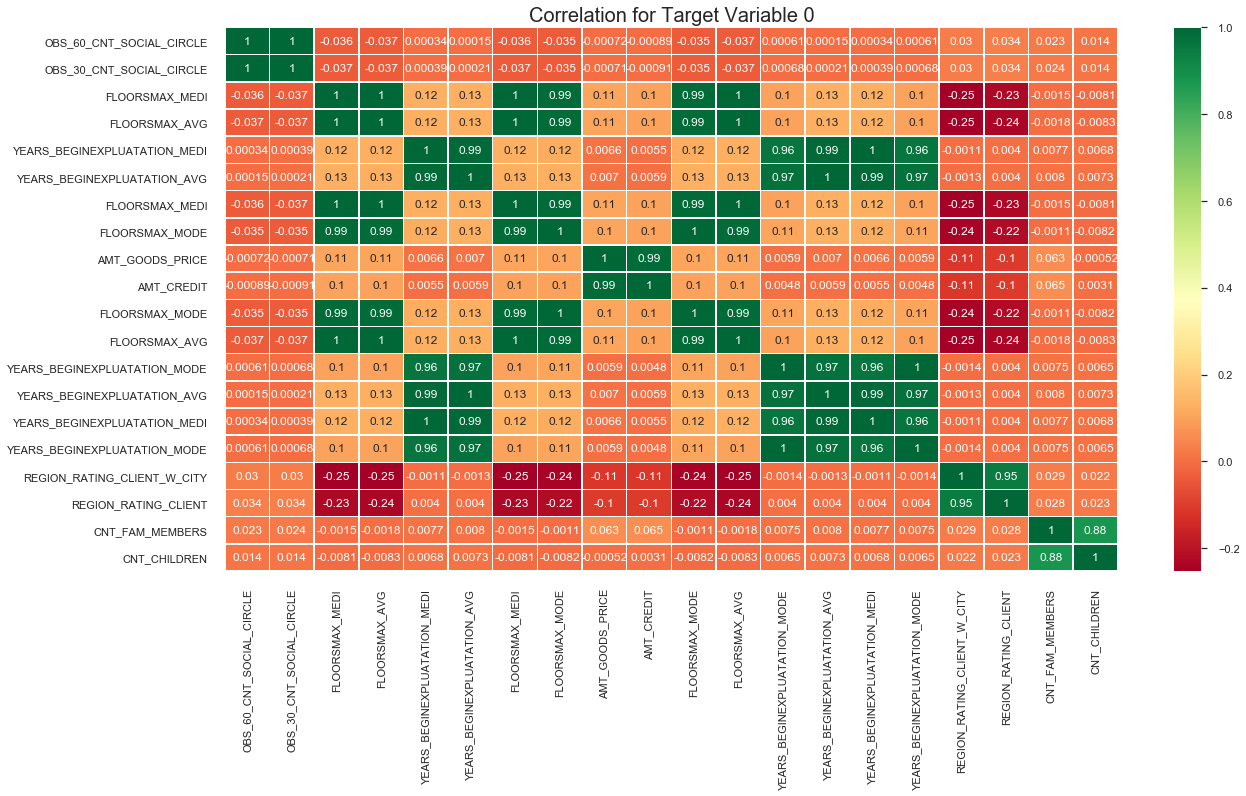

In [90]:
plt.figure(figsize = (20,10))

ax = plt.axes()
sns.heatmap(top_corr_df0.corr(),annot = True, linewidth = 0.5,cmap = "RdYlGn")
ax.set_title("Correlation for Target Variable 0", fontsize =20)
plt.show()


Observations from the graph above:
- For Higher "AMT_GOODS_PRICE" the "AMT_CREDIT" is highly correlated. Since the loan amount borrowed against expensive goods is usually high. This can be seen in the correlation heatmap above.
- Variables "YEARS_BEGINEXPLUATATION_AVG" & "YEARS_BEGINEXPLUATATION_MEDI" and "AMT_CREDIT" & "AMT_GOODS_PRICE" have less correlation. It could mean that the normalized information of the building where the client lives and Loan Amount or Goods Price have less correlation between them.


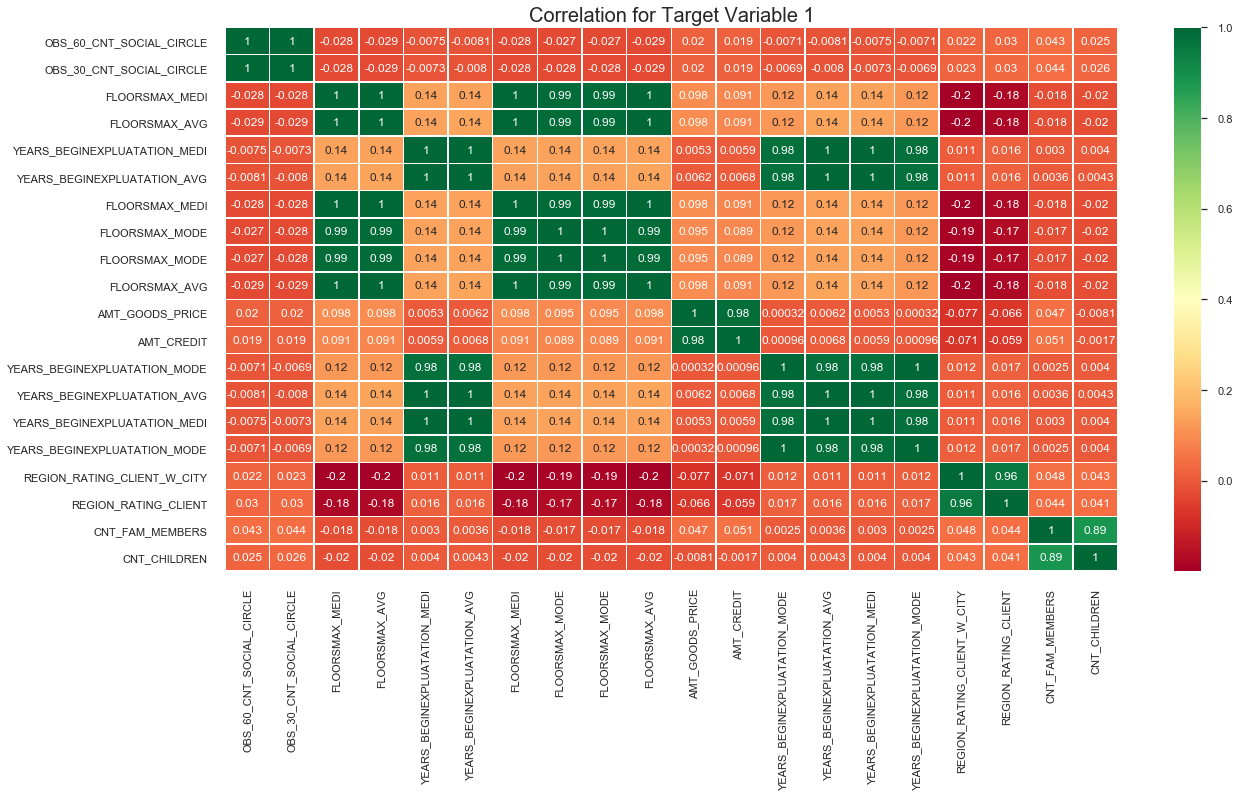

In [91]:
plt.figure(figsize = (20,10))

ax = plt.axes()
sns.heatmap(top_corr_df1.corr(),annot = True, linewidth = 0.5,cmap = "RdYlGn")
ax.set_title("Correlation for Target Variable 1", fontsize =20)
plt.show()


The heatmap correlation for target variable 1 and 0 shows a similar trend.
- There is a negative correlation between number of children and the Credit amount. More credit amount is given for clients with less number of children.
- Credit Amount and number of family members have less correlation.
- As the Amount Credited increases, Amount of goods increases.

### Analyzing the heatmap for both types of clients:

- Amount Goods and amount credit are highly corelated irrespective of the client who is struggling for repaying or the clients who are paying timely.

### Bivariate Analysis for Categorical~Categorical columns

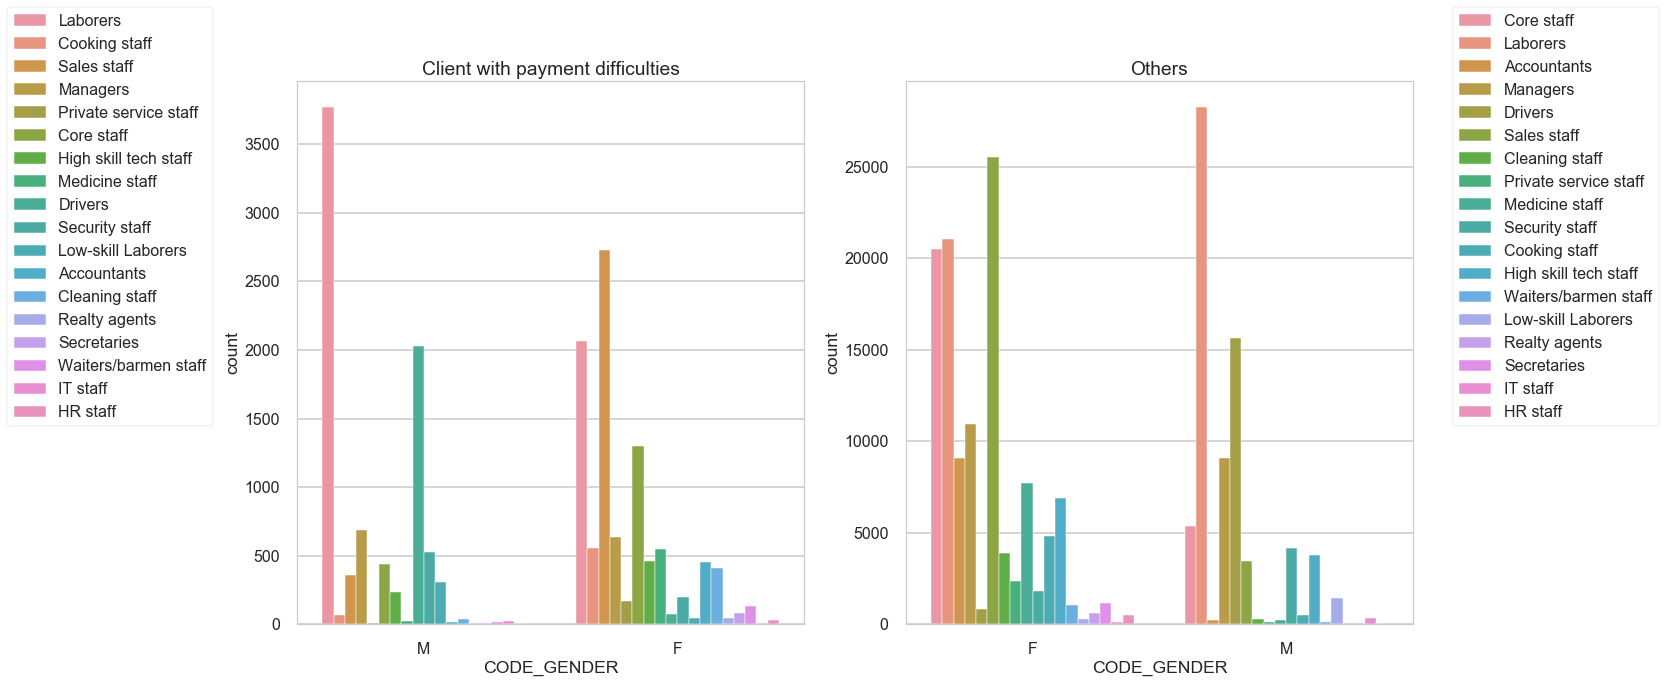

In [92]:
# Plotting CODE_GENDER against OCCUPATION_TYPE

plt.style.use("seaborn-poster")
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
chart1 = sns.countplot(x = df1.CODE_GENDER ,hue = df1.OCCUPATION_TYPE, data=df1)
chart1.legend(loc='right', bbox_to_anchor=(-0.15, 0.75), ncol=1)


plt.subplot(1,2,2)
plt.title("Others")
chart2 = sns.countplot(x = df0.CODE_GENDER,hue= df0.OCCUPATION_TYPE, data=df0)
chart2.legend(loc='right', bbox_to_anchor=(1.5, 0.75), ncol=1)
plt.show()

For target 1 and 0 a similar trend is observed.
Males from laborer category and females from Sales Staff category face the most payment difficulties.

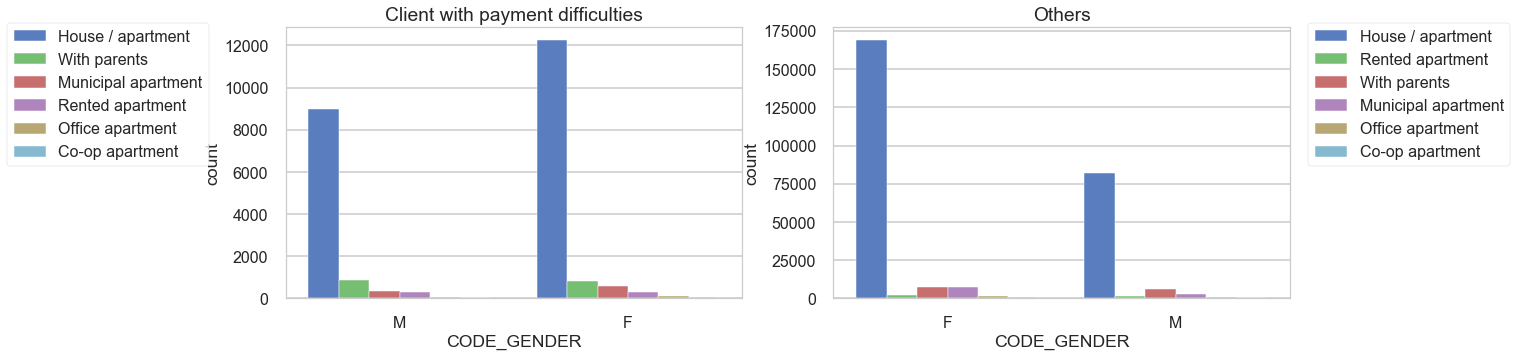

In [93]:
# Plotting CODE_GENDER against NAME_HOUSING_TYPE

plt.style.use("seaborn-poster")
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
chart1 = sns.countplot(x = df1.CODE_GENDER ,hue = df1.NAME_HOUSING_TYPE, data=df1)
chart1.legend(loc='right', bbox_to_anchor=(-0.15, 0.75), ncol=1)

plt.subplot(1,2,2)
plt.title("Others")
chart2 = sns.countplot(x = df0.CODE_GENDER,hue= df0.NAME_HOUSING_TYPE, data=df0)
chart2.legend(loc='right', bbox_to_anchor=(1.5, 0.75), ncol=1)
plt.show()

Irrespective of the target variable and gender, the most clients live in house/apartment.

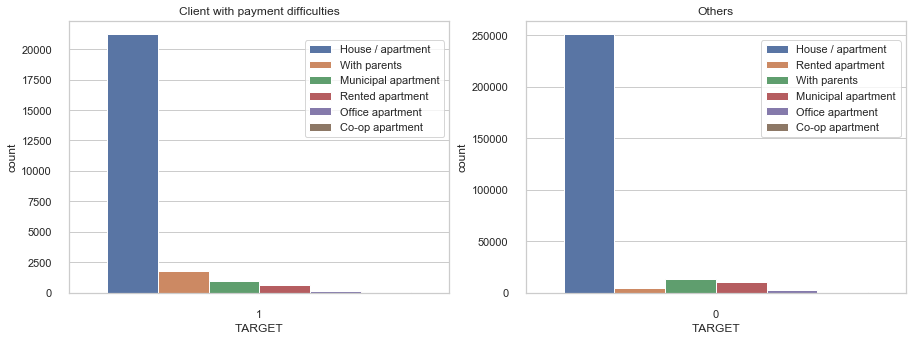

In [94]:
# Plotting TARGET against NAME_HOUSING_TYPE

sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
chart1 = sns.countplot(x = df1.TARGET ,hue = df1.NAME_HOUSING_TYPE, data=df1)
chart1.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)

plt.subplot(1,2,2)
plt.title("Others")
chart2 = sns.countplot(x = df0.TARGET,hue= df0.NAME_HOUSING_TYPE, data=df0)
chart2.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
plt.show()

We could infer that most of the clients (250000 approx) who repay without struggling are belonging to house/apartment housing type while  aproximately 20000 clients of house/apartment category have payment difficulties.

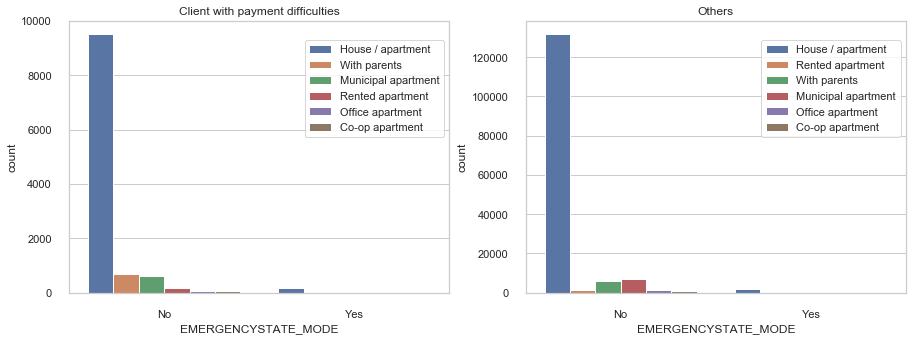

In [95]:
# Plotting EMERGENCYSTATE_MODE against NAME_HOUSING_TYPE

sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
chart1 = sns.countplot(x = df1.EMERGENCYSTATE_MODE ,hue = df1.NAME_HOUSING_TYPE, data=df1)
chart1.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)

plt.subplot(1,2,2)
plt.title("Others")
chart2 = sns.countplot(x = df0.EMERGENCYSTATE_MODE,hue= df0.NAME_HOUSING_TYPE, data=df0)
chart2.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
plt.show()

We coud see that both types of clients i.e with difficulty in payment as well as who pays without any delay has the most clents in house/apartment for EMERGENCYSTATE_MODE as No

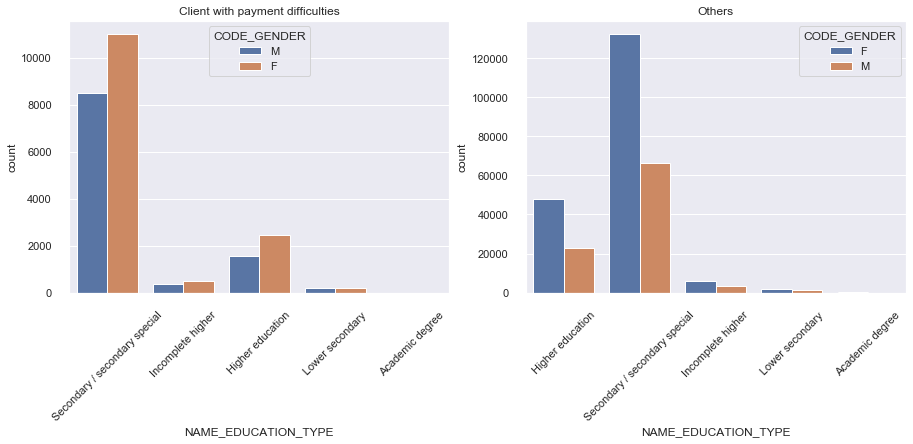

In [96]:
# Plotting NAME_EDUCATION_TYPE against CODE_GENDER

sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
chart1 = sns.countplot(x = df1.NAME_EDUCATION_TYPE ,hue = df1.CODE_GENDER, data=df1)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
plt.title("Others")
chart = sns.countplot(x = df0.NAME_EDUCATION_TYPE,hue= df0.CODE_GENDER, data=df0)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

We could see that clients having education type as Academic are least active in seeking loans and clients with Secondary/secondary special education type are the most active ones. Also approximately 130000 female clients with secondary education pays the loan on time.

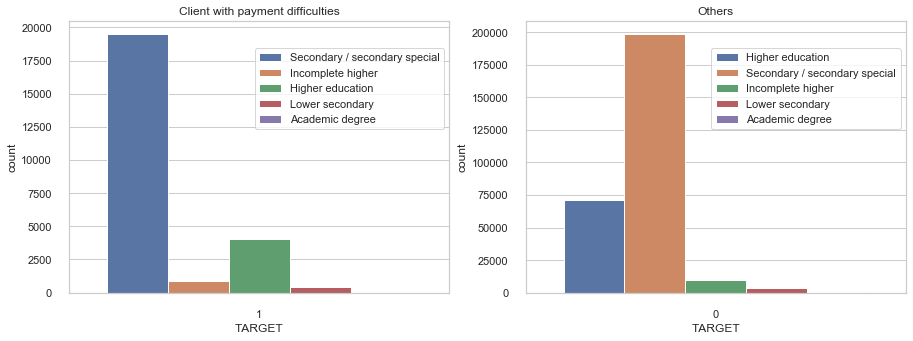

In [97]:
# Plotting TARGET against NAME_EDUCATION_TYPE

sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
chart1 = sns.countplot(x = df1.TARGET ,hue = df1.NAME_EDUCATION_TYPE, data=df1)
chart1.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)

plt.subplot(1,2,2)
plt.title("Others")
chart2 = sns.countplot(x = df0.TARGET,hue= df0.NAME_EDUCATION_TYPE, data=df0)
chart2.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
plt.show()

Clients having secondary education who pay the loan without any delay are approximately 200000 while Clients having secondary education who face payment difficulties are approximately 19000.

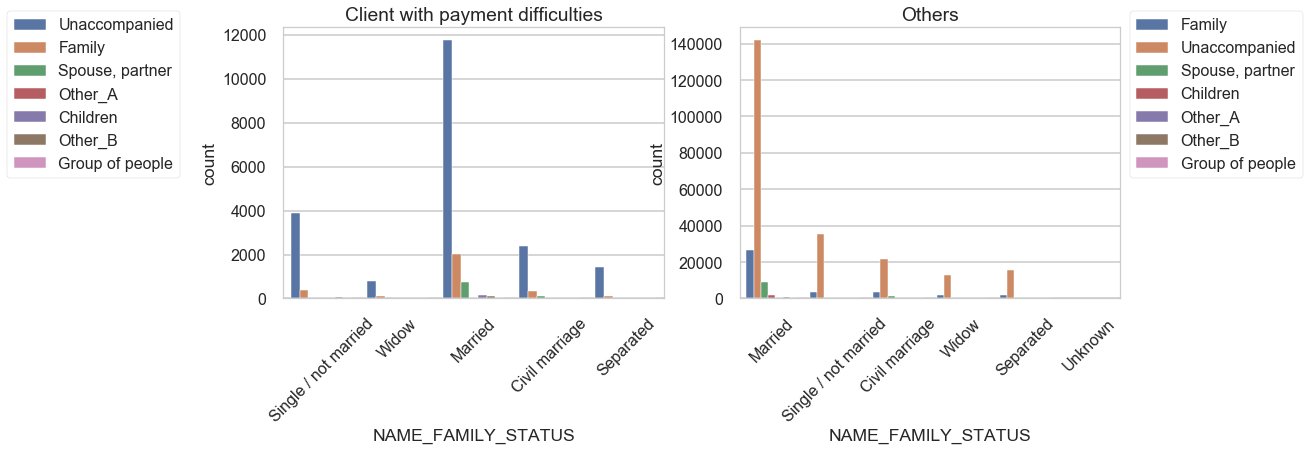

In [98]:
# Plotting NAME_FAMILY_STATUS against NAME_TYPE_SUITE

plt.style.use("seaborn-poster")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
chart = sns.countplot(x = df1.NAME_FAMILY_STATUS ,hue = df1.NAME_TYPE_SUITE, data=df1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='right', bbox_to_anchor=(-0.25, 0.75), ncol=1)

plt.subplot(1,2,2)
plt.title("Others")
chart1 = sns.countplot(x = df0.NAME_FAMILY_STATUS,hue= df0.NAME_TYPE_SUITE, data=df0)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart1.legend(loc='right', bbox_to_anchor=(1.5, 0.75), ncol=1)
plt.show()

We can see that most married clients seek loans. Also majority of the married clients approx 140000 are able to pay on time while just approximately 12000 married clients face difficulty in the repayment.

### Bivariate Analysis for Continuous~Continuous columns

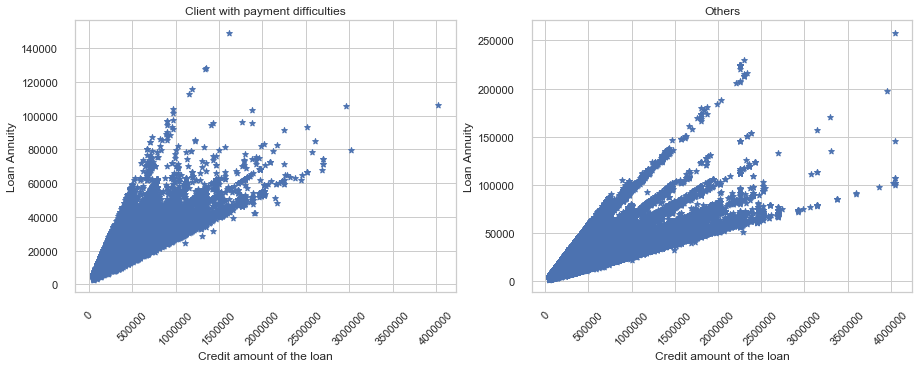

In [99]:
# Plotting AMT_ANNUITY against AMT_CREDIT

sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.scatter(df1.AMT_CREDIT,df1.AMT_ANNUITY,marker = '*')
plt.xticks(rotation=45)

plt.ylabel("Loan Annuity")
plt.xlabel("Credit amount of the loan")

plt.subplot(1,2,2)
plt.title("Others")
plt.scatter(df0.AMT_CREDIT,df0.AMT_ANNUITY,marker = '*')
plt.xticks(rotation=45)
plt.ylabel("Loan Annuity")
plt.xlabel("Credit amount of the loan")
plt.show()

For clients who are repaying loans without any delay, We could see some instance for very high credit amount approximately  4000000 for loan annuity approximately 100000.

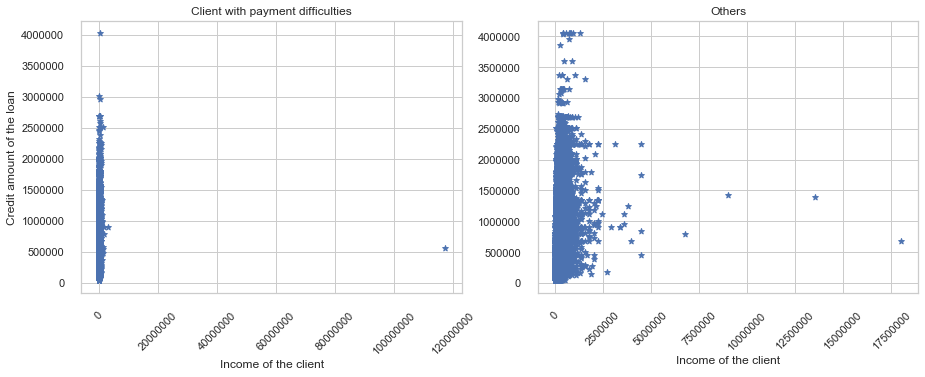

In [100]:
# Plotting AMT_INCOME_TOTAL against AMT_CREDIT

sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.scatter(df1.AMT_INCOME_TOTAL ,df1.AMT_CREDIT,marker = '*')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.xlabel("Income of the client")
plt.ylabel("Credit amount of the loan")

plt.subplot(1,2,2)
plt.title("Others")
plt.scatter(df0.AMT_INCOME_TOTAL ,df0.AMT_CREDIT,marker = '*')
plt.gcf().axes[1].xaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.xlabel("Income of the client")
plt.show()

For clients who are repaying loans without any delay have more income than the clients who are facing difficulty in repayment

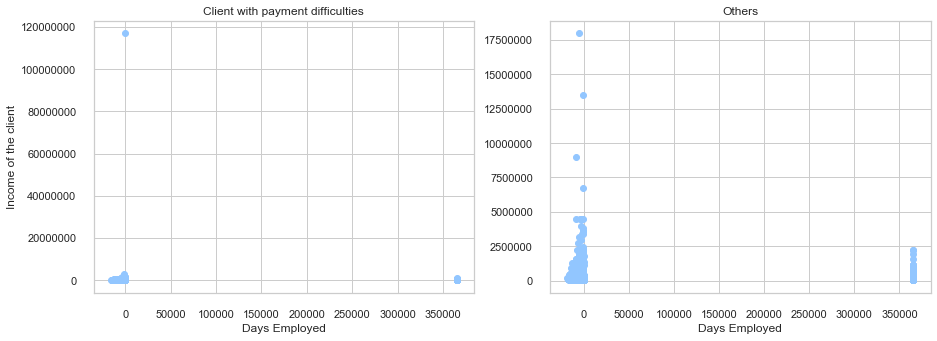

In [101]:
# Plotting DAYS_EMPLOYED against AMT_INCOME_TOTAL

plt.style.use("seaborn-pastel")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.scatter(df1.DAYS_EMPLOYED ,df1.AMT_INCOME_TOTAL)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Days Employed")
plt.ylabel("Income of the client")

plt.subplot(1,2,2)
plt.title("Others")
plt.scatter(df0.DAYS_EMPLOYED ,df0.AMT_INCOME_TOTAL)
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Days Employed")
plt.show()

Clients having difficulty in payment have less income and have recently started the current employment while clients who repay without any delay have comparatively higher income. Also for the clients who dont face any difficulty there exists some clients who are in the current employment from the very long time. 

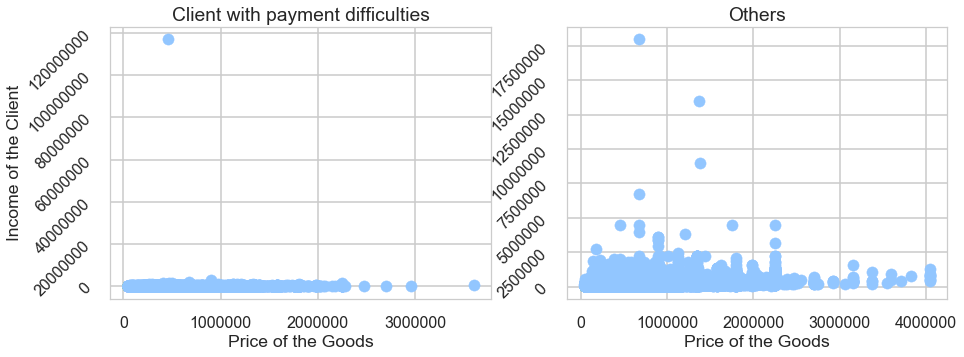

In [102]:
# Plotting AMT_GOODS_PRICE against AMT_INCOME_TOTAL

plt.style.use("seaborn-poster")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.scatter(df1.AMT_GOODS_PRICE ,df1.AMT_INCOME_TOTAL)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.yticks(rotation=45)
plt.xlabel("Price of the Goods")
plt.ylabel("Income of the Client")

plt.subplot(1,2,2)
plt.title("Others")
plt.scatter(df0.AMT_GOODS_PRICE ,df0.AMT_INCOME_TOTAL)
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Price of the Goods")
plt.yticks(rotation=45)
plt.show()

For clients having difficulty in payment have less income and most of the goods price are upto 2000000 while clients who repay without any delay have comparatively higher income. Also for the clients who dont face any difficulty there exists few clients who has the goods price as very high. 

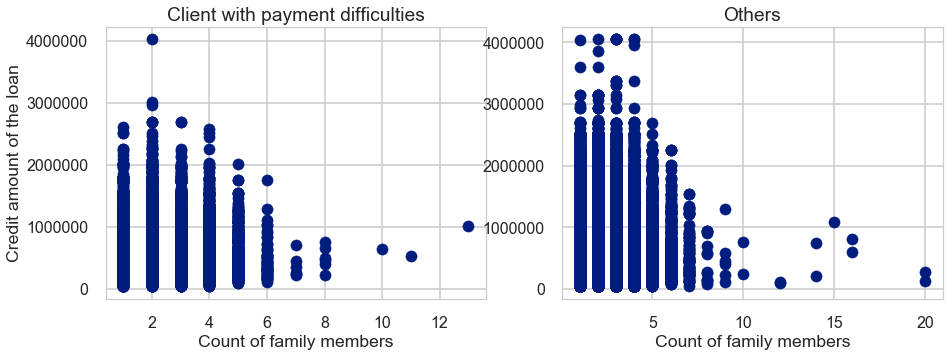

In [103]:
# Plotting CNT_FAM_MEMBERS against AMT_CREDIT


plt.style.use("seaborn-dark-palette")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
plt.scatter(df1.CNT_FAM_MEMBERS ,df1.AMT_CREDIT)
plt.xlabel("Count of family members")
plt.ylabel("Credit amount of the loan")


plt.subplot(1,2,2)
plt.title("Others")
plt.scatter(df0.CNT_FAM_MEMBERS,df0.AMT_CREDIT)
plt.xlabel("Count of family members")
plt.show()

Clients having difficulty in payment have less credit amount overall and have lesser family members while clients who repay without any delay have comparatively higher credit amount. Also for the clients who dont face any difficulty have higher and much scattered credit amount.

### Bivariate Analysis for Continuous~Category columns

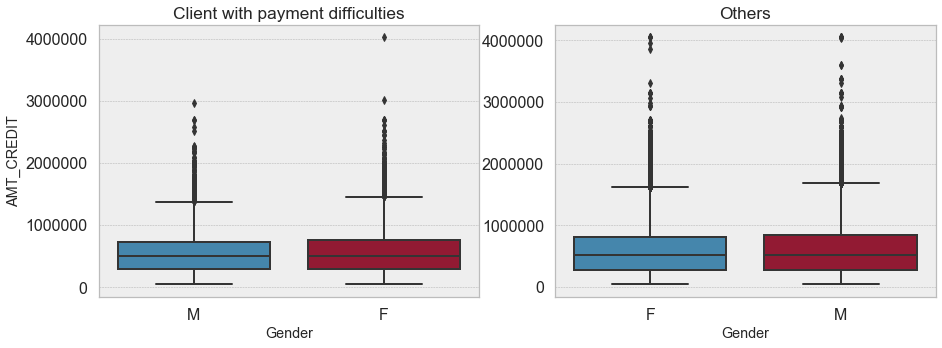

In [104]:
# Plotting AMT_CREDIT against Gender

plt.style.use("bmh")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
sns.boxplot(y = df1.AMT_CREDIT ,x = df1.CODE_GENDER, data = df1)
plt.xlabel("Gender")



plt.subplot(1,2,2)
plt.title("Others")
sns.boxplot(y = df0.AMT_CREDIT ,x = df0.CODE_GENDER, data = df0)
plt.ylabel(" ")
plt.xlabel("Gender")


plt.show()

- Clients who pay without struggling constitutes few female clients who have higher credit amount compared to female clients who struggle to pay.
- Average credit amount of male and females for clients with payment difficuties are almost same. Similar trend is seen for the clients who pay loans without any delay.

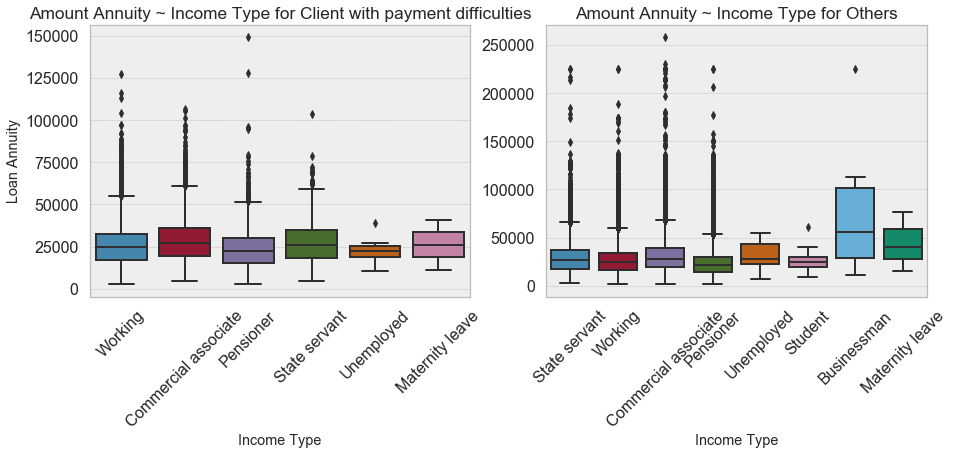

In [105]:
# Plotting AMT_ANNUITY against Income Type

plt.style.use("bmh")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Amount Annuity ~ Income Type for Client with payment difficulties")
sns.boxplot(y = df1.AMT_ANNUITY ,x = df1.NAME_INCOME_TYPE, data = df1)
plt.ylabel("Loan Annuity")
plt.xlabel("Income Type")
plt.xticks(rotation=45)



plt.subplot(1,2,2)
plt.title("Amount Annuity ~ Income Type for Others")
sns.boxplot(y = df0.AMT_ANNUITY ,x = df0.NAME_INCOME_TYPE, data = df0)
plt.ylabel(" ")
plt.xlabel("Income Type")
plt.xticks(rotation=45)

plt.show()

- Clients having payment difficulties whose income type is "Unemployed" have more uniform distribution as the second quartile lies in the centre whereas Unemployed clients who are paying on time has a non uniform plot.
- Some clients who repay without any delay have higher loan annuity for "commercial associate" as compared to "commercial associate" clients who struggle to pay as more outliers are present for these.
- There are no outliers present for Clients on Maternity leave with payment difficulties and it has uniform distribution. Even For the "bussinessman" clients and those clients on "maternity leave" who repay without any delay have no outliers.


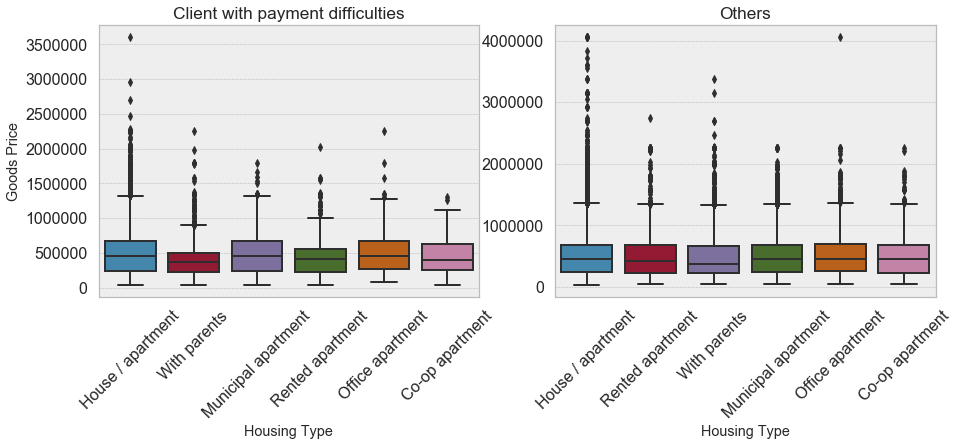

In [106]:
# Plotting AMT_GOODS_PRICE against NAME_HOUSING_TYPE

plt.style.use("bmh")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
sns.boxplot(y = df1.AMT_GOODS_PRICE ,x = df1.NAME_HOUSING_TYPE, data = df1)
plt.ylabel("Goods Price")
plt.xlabel("Housing Type")
plt.xticks(rotation=45)



plt.subplot(1,2,2)
plt.title("Others")
sns.boxplot(y = df0.AMT_GOODS_PRICE ,x = df0.NAME_HOUSING_TYPE, data = df1)
plt.xlabel("Housing Type")
plt.ylabel(" ")
plt.xticks(rotation=45)

plt.show()

Clients who pay without struggling have uniform distribution throughout all the housing type except the ones living with parents. These clients have almost similar average goods Price.

Clients facing difficulty in repayment for House/apartment and Municipal apartment have almost similar mean goods price and is higher than other housing type clients who are facing diffiulty in payment.

Some clients who pay without struggling have higher goods price for housing type "house/apartment" and "with parents"  as compared to clients who struggle to pay for category housing type "house/apartment" and "with parents".

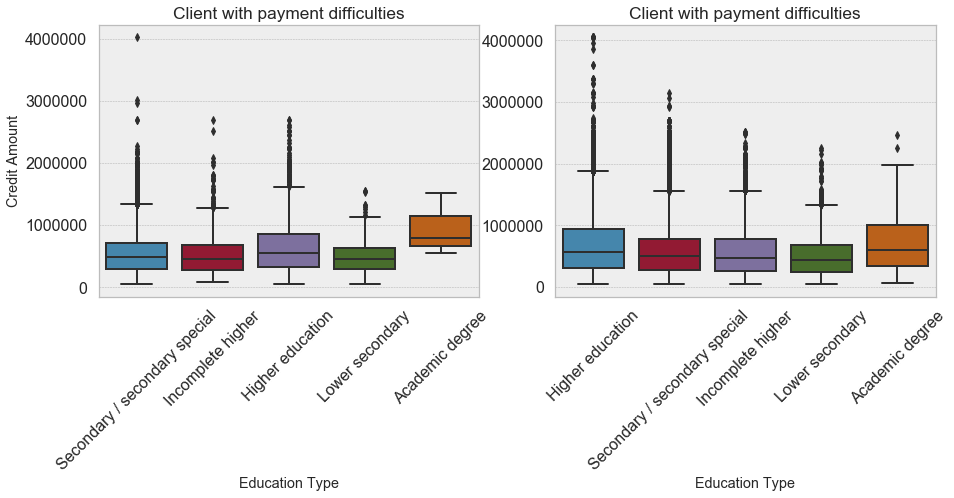

In [107]:
# Plotting AMT_CREDIT against Education Type

plt.style.use("bmh")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
sns.boxplot(y = df1.AMT_CREDIT ,x = df1.NAME_EDUCATION_TYPE, data = df1)
plt.ylabel("Credit Amount")
plt.xlabel("Education Type")
plt.xticks(rotation=45)



plt.subplot(1,2,2)
plt.title("Client with payment difficulties")
sns.boxplot(y = df0.AMT_CREDIT ,x = df0.NAME_EDUCATION_TYPE, data = df0)
plt.xlabel("Education Type")
plt.ylabel(" ")
plt.xticks(rotation=45)


plt.show()

Clients facing difficulty in payment with education type as "Higher education" has the maximum credit amount among all the clients who are facing difficulty. Also, Average credit amount for academic degree clients with payment difficulties is highest among all the clients.


Clients paying timely and having an academic degree have the highest credit amount.


Higher education clients who don’t face difficulty in repayment has a lot of outliers present inferring that some clients seeks loans for much higher credit loan amount than the mean credit loan amount. 


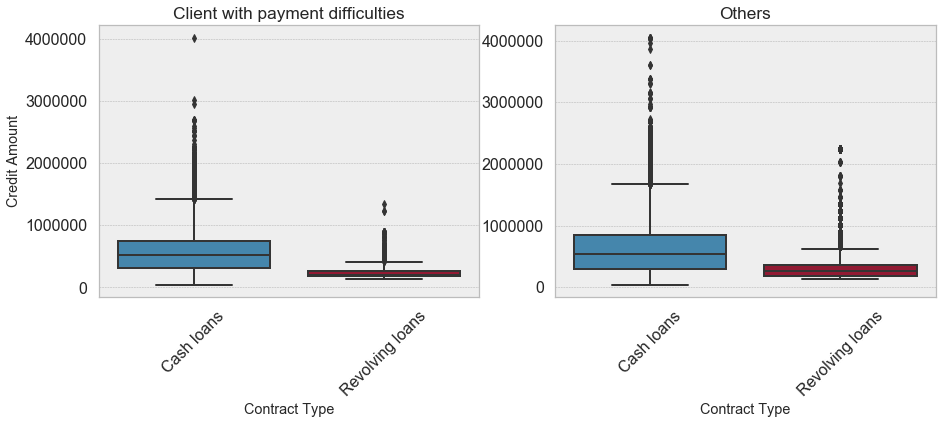

In [108]:
# Plotting AMT_CREDIT against NAME_CONTRACT_TYPE

plt.style.use("bmh")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Client with payment difficulties")
sns.boxplot(y = df1.AMT_CREDIT ,x = df1.NAME_CONTRACT_TYPE, data = df1)
plt.ylabel("Credit Amount")
plt.xlabel("Contract Type")
plt.xticks(rotation=45)



plt.subplot(1,2,2)
plt.title("Others")
sns.boxplot(y = df0.AMT_CREDIT ,x = df0.NAME_CONTRACT_TYPE, data = df0)
plt.ylabel(" ")
plt.xlabel("Contract Type")
plt.xticks(rotation=45)

plt.show()

For clients opting for revolving loans and facing difficulty in payment have much less credit amount. Also For clients opting for cash loans and facing no difficulty in payment have much higher credit amount for some of the clients.

Clients with contract type as Revolving loans and are paying on time have a uniform distribution about the median unlike revolving loan clients with payment difficulties.

Overall for most of the clients having cash loans contract type, the credit amount is higher than than credit amount for revolving loans.

In [109]:
#reading Previous application file

prev_app = pd.read_csv("previous_application.csv")

In [110]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [111]:
prev_app.shape

(1670214, 37)

In [112]:
app.shape

(307511, 83)

In [113]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [114]:
prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [115]:
# Check numeric columns
prev_app.select_dtypes('int64', 'float64').head(5)

SK_ID_PREV  SK_ID_CURR  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
0     2030495      271877                       15                       1   
1     2802425      108129                       11                       1   
2     2523466      122040                       11                       1   
3     2819243      176158                        7                       1   
4     1784265      202054                        9                       1   

   DAYS_DECISION  SELLERPLACE_AREA  
0            -73                35  
1           -164                -1  
2           -301                -1  
3           -512                -1  
4           -781                -1

In [116]:
# Checking unique values in columns
prev_app.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
RATE_INTEREST_PRIMARY              148
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE            

In [117]:
# Number of missing values in each column
obj1 = prev_app.isnull().sum()
for key1,value1 in obj1.iteritems():
    print(key1,":",value1)

SK_ID_PREV : 0
SK_ID_CURR : 0
NAME_CONTRACT_TYPE : 0
AMT_ANNUITY : 372235
AMT_APPLICATION : 0
AMT_CREDIT : 1
AMT_DOWN_PAYMENT : 895844
AMT_GOODS_PRICE : 385515
WEEKDAY_APPR_PROCESS_START : 0
HOUR_APPR_PROCESS_START : 0
FLAG_LAST_APPL_PER_CONTRACT : 0
NFLAG_LAST_APPL_IN_DAY : 0
RATE_DOWN_PAYMENT : 895844
RATE_INTEREST_PRIMARY : 1664263
RATE_INTEREST_PRIVILEGED : 1664263
NAME_CASH_LOAN_PURPOSE : 0
NAME_CONTRACT_STATUS : 0
DAYS_DECISION : 0
NAME_PAYMENT_TYPE : 0
CODE_REJECT_REASON : 0
NAME_TYPE_SUITE : 820405
NAME_CLIENT_TYPE : 0
NAME_GOODS_CATEGORY : 0
NAME_PORTFOLIO : 0
NAME_PRODUCT_TYPE : 0
CHANNEL_TYPE : 0
SELLERPLACE_AREA : 0
NAME_SELLER_INDUSTRY : 0
CNT_PAYMENT : 372230
NAME_YIELD_GROUP : 0
PRODUCT_COMBINATION : 346
DAYS_FIRST_DRAWING : 673065
DAYS_FIRST_DUE : 673065
DAYS_LAST_DUE_1ST_VERSION : 673065
DAYS_LAST_DUE : 673065
DAYS_TERMINATION : 673065
NFLAG_INSURED_ON_APPROVAL : 673065


In [118]:
# Percentage of missing values in each column:
percentage_missing_values1 = round(prev_app.isnull().mean() * 100, 2)
percentage_missing_values1

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [119]:
# Listing the columns which have a high percentage of missing values (>=50%)
percentage_missing_values1[percentage_missing_values1.values >= 50]

AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64

In [120]:
percentage_missing_values1[percentage_missing_values1.values >= 50].count()

4

4 columns have >=50 % of missing values

In [121]:
# Dropping these columns
dropcol1 = list(percentage_missing_values1[percentage_missing_values1.values>=50].index)
# print(len(dropcol1)) 
# Check number of columns before dropping : 4
prev_app.drop(labels=dropcol1, axis=1, inplace=True)


In [122]:
app.shape

(307511, 83)

In [123]:
prev_app.shape

(1670214, 33)

In [124]:
prev_app.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

We can see that the columns have now been dropped.

In [125]:
# Check columns with low percentage of missing values (<=13)
percentage_missing_values1[np.logical_and(percentage_missing_values1.values <=13, percentage_missing_values1.values > 0)]

PRODUCT_COMBINATION    0.02
dtype: float64

In [126]:
percentage_missing_values1[np.logical_and(percentage_missing_values1.values <=13, percentage_missing_values1.values > 0)].count()

1

There is only 1 column with less number of missing values.

Above column have <=13% of missing values. The missing values for these columns can be imputed using appropriate methods as discussed below.

In [127]:
# Checking values in PRODUCT_COMBINATION column
prev_app.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [128]:
prev_app.PRODUCT_COMBINATION.mode()

0    Cash
dtype: object

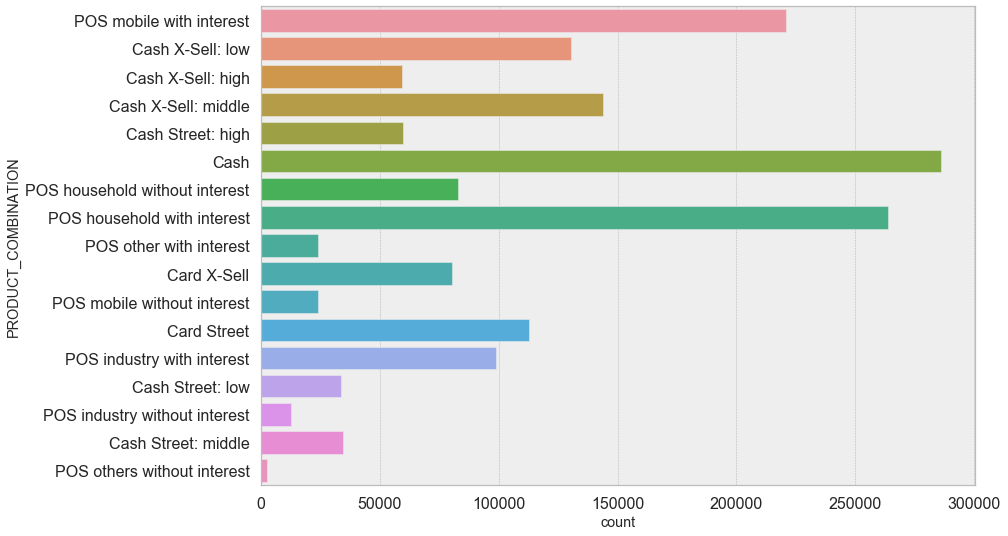

In [129]:
# Plotting the count of PRODUCT_COMBINATION against the various values present.
# PRODUCT_COMBINATION - Detailed product combination of the previous application
sns.countplot(y = prev_app.PRODUCT_COMBINATION, data = prev_app)
plt.show()

As PRODUCT_COMBINATION is a categorical variable and has only few null values(approax - 0.02 %), we can impute this column with the mode value i.e "Cash" as its ocurring for 235101 times in the column.

In [130]:
# Verifying that the column has correct data type
prev_app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [131]:
# Checking number of unique values in each column
prev_app.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CONTRACT_TYPE                   4
NAME_CLIENT_TYPE                     4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_STATUS                 4
NAME_YIELD_GROUP                     5
NAME_PORTFOLIO                       5
NAME_TYPE_SUITE                      7
WEEKDAY_APPR_PROCESS_START           7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE                     2873
DAYS_FIRST_DUE                    2892
DAYS_DECISION            

##### Categorical columns needed to be converted to object data type


<pre>
Column name                   dtype     count <br>
HOUR_APPR_PROCESS_START		int64    24 <br>
NFLAG_INSURED_ON_APPROVAL      float64  2 <br>
NFLAG_LAST_APPL_IN_DAY	      int64   2<br>
</pre>

In [132]:
#Below columns are converted to the object type

prev_app.HOUR_APPR_PROCESS_START = prev_app.HOUR_APPR_PROCESS_START.astype('str')
prev_app.NFLAG_INSURED_ON_APPROVAL = prev_app.NFLAG_INSURED_ON_APPROVAL.astype('str')
prev_app.NFLAG_LAST_APPL_IN_DAY = prev_app.NFLAG_LAST_APPL_IN_DAY.astype('str')

In [133]:
# Verifying the datatypes
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  object 
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  object 
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [134]:
# Obtain the numeric columns:
prev_app._get_numeric_data().head(2)

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     1730.430          17145.0     17145.0   
1     2802425      108129    25188.615         607500.0    679671.0   

   AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
0          17145.0            -73                35         12.0   
1         607500.0           -164                -1         36.0   

   DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
0            365243.0           -42.0                      300.0   
1            365243.0          -134.0                      916.0   

   DAYS_LAST_DUE  DAYS_TERMINATION  
0          -42.0             -37.0  
1       365243.0          365243.0

### Merging the datasets

In [135]:
common = pd.merge(app , prev_app , how='inner' , on='SK_ID_CURR')

In [136]:
common.shape

(1413701, 115)

In [137]:
common.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002      1           Cash loans           M            N   
1      100003      0           Cash loans           F            N   
2      100003      0           Cash loans           F            N   
3      100003      0           Cash loans           F            N   
4      100004      0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.003541       16765          -1188            -1186.0   
3                    0.003541       16765          -1188            -1186.0   
4                    0.010032       19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2             -291           1               1                0   
3             -291           1               1                0   
4            -2531           1               1                1   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                1          1          0        Laborers              1.0   
1                1          1          0      Core staff              2.0   
2                1          1          0      Core staff              2.0   
3                1          1          0      Core staff              2.0   
4                1          1          0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                  

### Determining outliers in combined dataset:

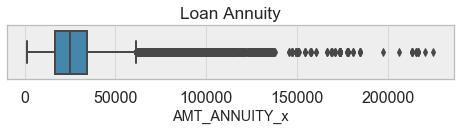

In [138]:
plt.figure(figsize=[8,1])
sns.boxplot(x = common.AMT_ANNUITY_x).set_title("Loan Annuity")
plt.show()

As seen in the boxplot above, most of the values for Loan Annuity is for less than 50000 . The rest of them are outliers however they are closely spaced outliers.

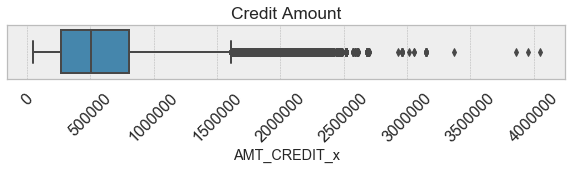

In [139]:
plt.figure(figsize=[10,1]) 
sns.boxplot(common.AMT_CREDIT_x).set_title('Credit Amount') 
plt.xticks(rotation=45) 
plt.show()

Credit amount shows outliers which are closely packed till 2500000 while most values lie upto 750000 approximately

In [140]:
# Value counts of target variable in previous application dataset:
common.NAME_CONTRACT_STATUS.value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [141]:
# Percentage values
common.NAME_CONTRACT_STATUS.value_counts(normalize=True) * 100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

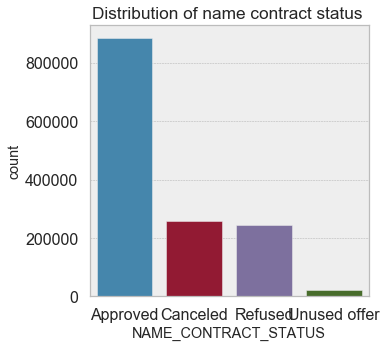

In [142]:
plt.figure(figsize=[5,5])
sns.countplot(x='NAME_CONTRACT_STATUS', data=common)
plt.title("Distribution of name contract status ")

plt.show()

As the 62.68% values are present for "Approved" Contract Status for Previous Application i.e clients got the approval for their loans and only 1.61% clients falls under the  group who did not use the offer.


### Univariate Analysis for Continuous Variable

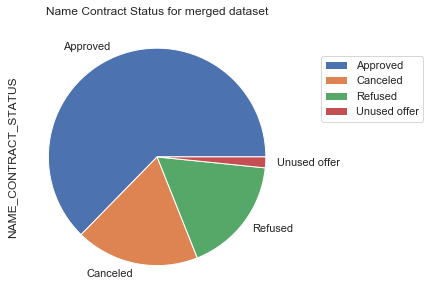

In [143]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
labels =["Approved","Canceled", "Refused", "Unused offer"]
plt.title("Name Contract Status for merged dataset")


chart1 = common.NAME_CONTRACT_STATUS.value_counts().plot.pie()
plt.legend(labels,loc=2)
chart1.legend(loc='right', bbox_to_anchor=(1.5, 0.75), ncol=1)
plt.show()

Maximum values are present for "Approved" Contract Status for Previous Application i.e clients got the approval for their loans and minimun number of clients falls under the  group who did not use the offer. Canceled and Refused category have almost similar percentage.

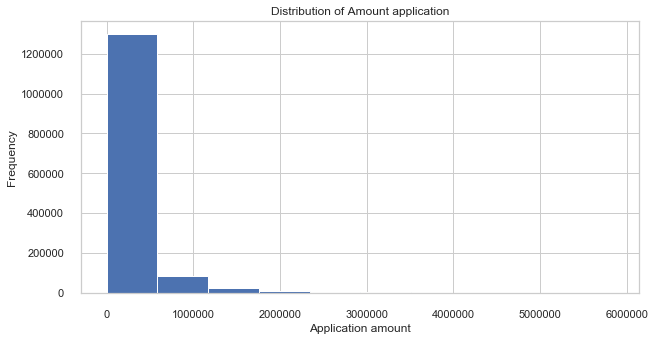

In [144]:
# Plotting histogram of application amount
plt.figure(figsize=(10,5))
plt.title("Distribution of Amount application")
common.AMT_APPLICATION.plot.hist()
plt.xlabel("Application amount")
plt.show()


Most client's application amount borrowed previously is not more than 500000.

Less number of clients have taken loans higher than amount 2000000.

 ## Bivariate analysis for categorical- categorical variables

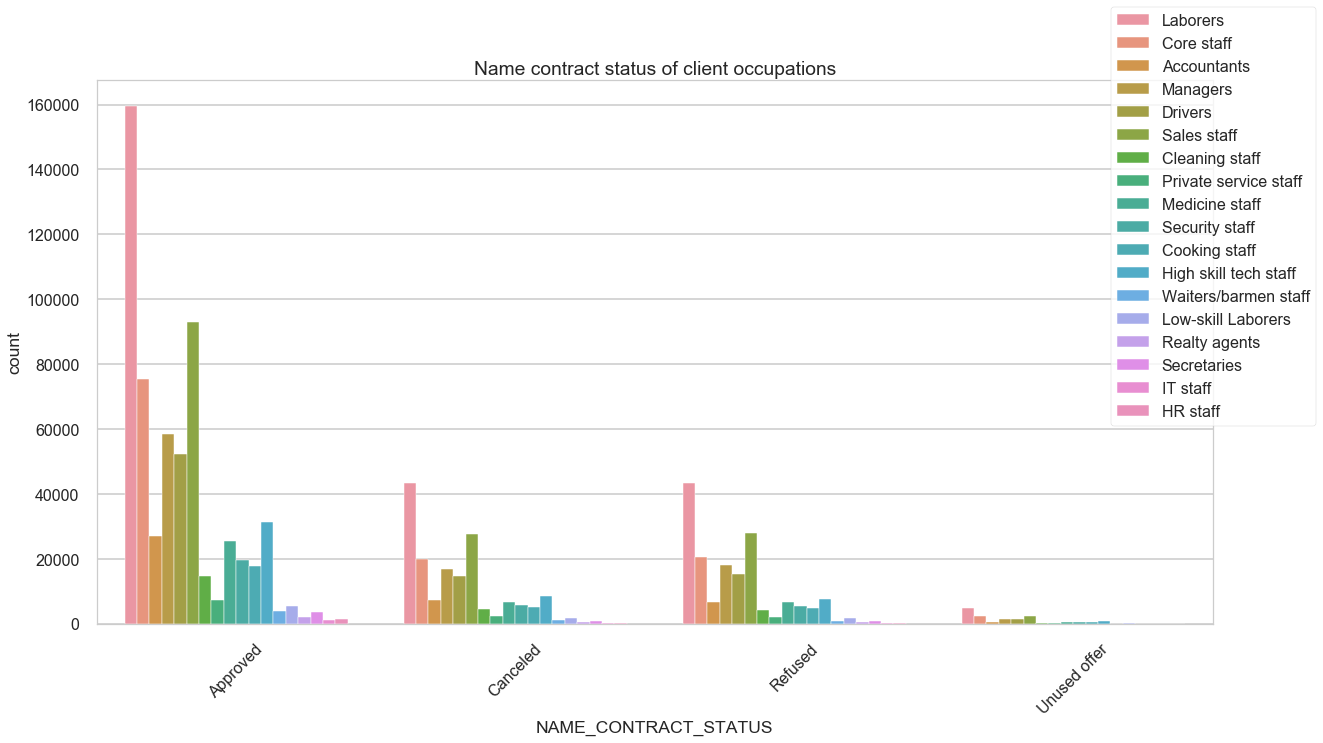

In [145]:
# Plotting NAME_CONTRACT_STATUS against OCCUPATION_TYPE

plt.style.use("seaborn-poster")
plt.figure(figsize=(20,10))
plt.title("Name contract status of client occupations")
chart1 = sns.countplot(x = common.NAME_CONTRACT_STATUS ,hue = common.OCCUPATION_TYPE, data=common)
chart1.legend(loc='right', bbox_to_anchor=(1.10, 0.75), ncol=1)
plt.xticks(rotation=45)
plt.show()

Maximum amount of approved loans are for laborer occupation clients and least approved is for "HR staff". 

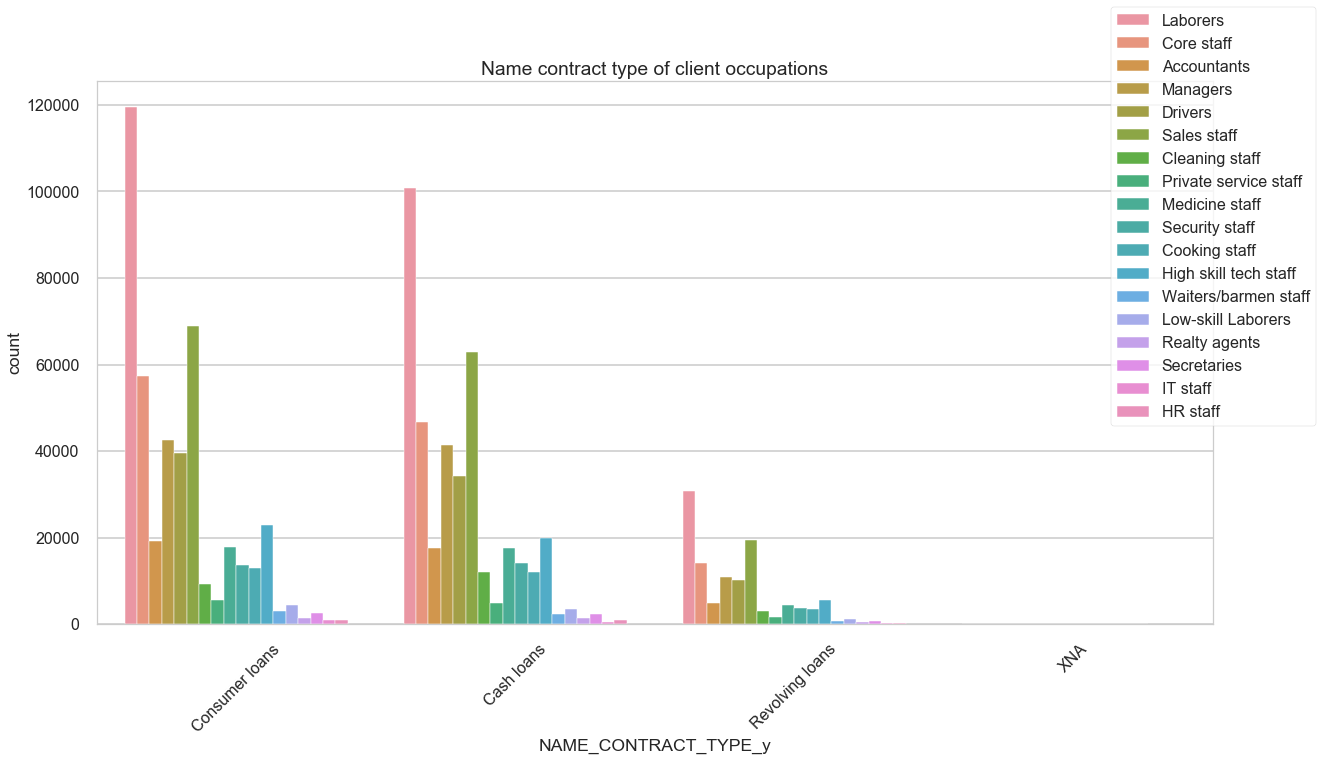

In [146]:
# Plotting NAME_CONTRACT_TYPE against OCCUPATION_TYPE

plt.style.use("seaborn-poster")
plt.figure(figsize=(20,10))
plt.title("Name contract type of client occupations")
chart1 = sns.countplot(x = common.NAME_CONTRACT_TYPE_y ,hue = common.OCCUPATION_TYPE, data=common)
chart1.legend(loc='right', bbox_to_anchor=(1.10, 0.75), ncol=1)
plt.xticks(rotation=45)
plt.show()

Previously Laborer occupation type were in the maximum category that were found to be taking every type of loan. 

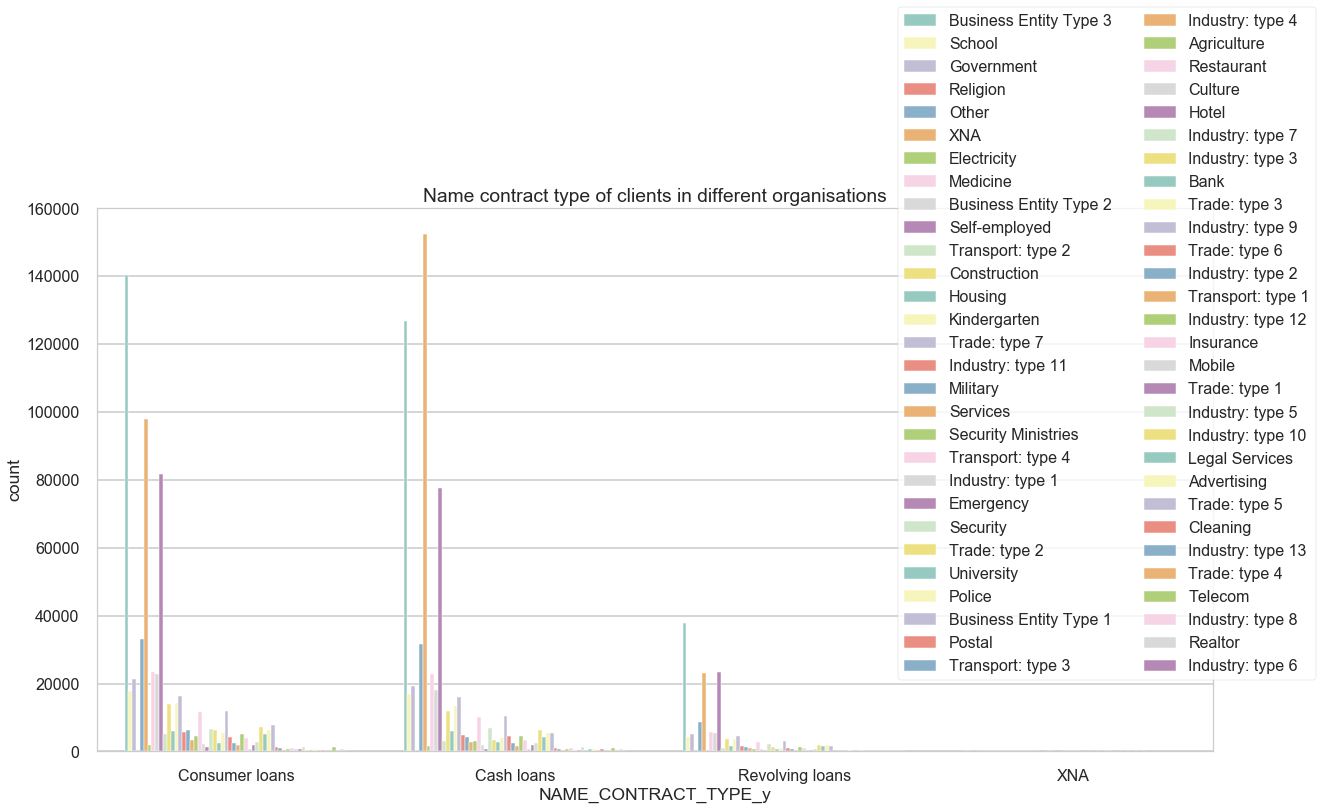

In [147]:
# Plotting NAME_CONTRACT_TYPE_y against ORGANIZATION_TYPE

plt.style.use("seaborn-poster")
plt.figure(figsize=(20,10))
plt.title("Name contract type of clients in different organisations")
chart1 = sns.countplot(x = common.NAME_CONTRACT_TYPE_y ,hue = common.ORGANIZATION_TYPE, data=common, palette="Set3")
chart1.legend(loc='right', bbox_to_anchor=(1.10, 0.75), ncol=2)

plt.show()

Ignoring XNA values for Organization Types, the "Business Entity Type 3" organization type takes maximum of all types of loans.


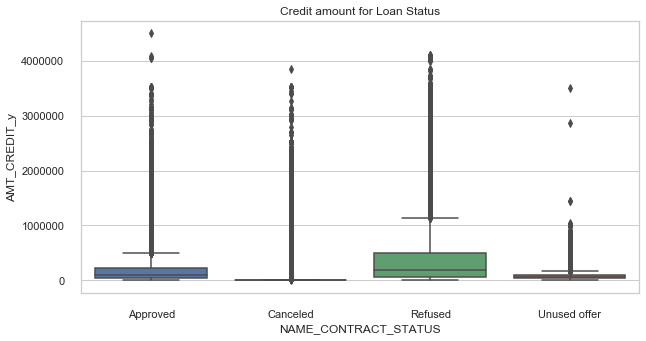

In [148]:
# Plotting NAME_CONTRACT_STATUS against AMT_CREDIT_y

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

plt.title("Credit amount for Loan Status")
sns.boxplot(x = common.NAME_CONTRACT_STATUS ,y = common.AMT_CREDIT_y, data=common)


plt.show()

We can see that the refused credit amount were high compared to the loans that were approved. Cancelled and Unused offer loan amount were relatively lower than both.

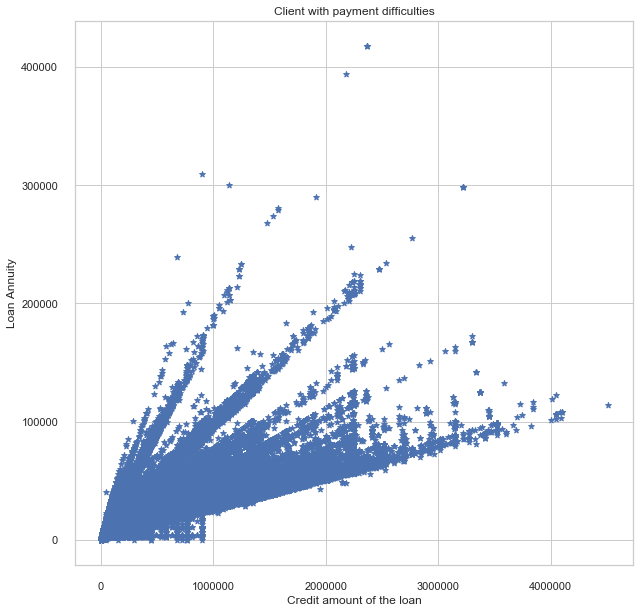

In [149]:
# Plotting AMT_CREDIT against AMT_ANNUITY

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

plt.title("Client with payment difficulties")
plt.scatter(common.AMT_CREDIT_y, common.AMT_ANNUITY_y ,marker = '*')
plt.ylabel("Loan Annuity")
plt.xlabel("Credit amount of the loan")
plt.show()

upto Credit Amount and Loan Annuity value 1000000 the variables are positively related. But post that the trend changes and Loan Annuity does not increase in proportion to the credit amount.

## Conclusion:

- Higher salaried clients are able to make timely payments. Bank should concentrate on such clients. Clients with low salary are likely to default.

- Maximum loan seekers are from the Working class. The bank should concentrate on such clients. The bank should not focus on unemployed clients.

- Laborer occupation type clients face difficulties with repayment of loans. Bank should not focus on such clients.

- Maximum clients who have Secondary Education do not have payment difficulties. So the bank should focus on this client category.

- Most clients living in House/apartment do not have payment difficulties. Bank should concentrate on these clients to maximize profits.

- Female gender clients are able to make payments compared to the males. So the bank should target higher number of female clients for successful payments.